##What is Customer Segmentation?
Customer segmentation is the process of dividing a company's customer base into distinct groups, or "segments", based on shared characteristics or behaviors. These segments allow businesses to better understand, serve, and target their customers.
This is a widely adopted practice in business and data science, used for:
Tailored marketing campaigns
Product recommendations
Personalized communication
Customer retention and churn prediction

##How is Segmentation Done in Practice?
We generally follow these steps:
Data Collection: Gather raw transactional data for each customer.
Feature Engineering: Summarize behavior per customer — e.g., how much they spend, how often they buy, and when they last purchased.
Data Preprocessing: Handle missing values, normalize numerical features.
Clustering Algorithms: Use unsupervised learning (e.g., KMeans, Agglomerative Clustering) to find naturally occurring customer groups.
Evaluation & Interpretation: Measure clustering quality (e.g., Silhouette Score), and interpret each segment (e.g., "high spenders", "loyal buyers", "inactive customers").


##Goal of This Analysis
Our task is to perform customer segmentation using historical transaction data from an online retail store. We aim to:
Group customers by behavior
Understand different customer types
Prepare insights that can drive better business decisions


What is Customer Segmentation?
Customer segmentation is the process of dividing a company's customer base into distinct groups, or "segments", based on shared characteristics or behaviors. These segments allow businesses to better understand, serve, and target their customers.

This is a widely adopted practice in business and data science, used for:

Tailored marketing campaigns
Product recommendations
Personalized communication
Customer retention and churn prediction
How is Segmentation Done in Practice?
We generally follow these steps:

Data Collection: Gather raw transactional data for each customer.
Feature Engineering: Summarize behavior per customer — e.g., how much they spend, how often they buy, and when they last purchased.
Data Preprocessing: Handle missing values, normalize numerical features.
Clustering Algorithms: Use unsupervised learning (e.g., KMeans, Agglomerative Clustering) to find naturally occurring customer groups.
Evaluation & Interpretation: Measure clustering quality (e.g., Silhouette Score), and interpret each segment (e.g., "high spenders", "loyal buyers", "inactive customers").
Goal of This Analysis
Our task is to perform customer segmentation using historical transaction data from an online retail store. We aim to:

Group customers by behavior
Understand different customer types
Prepare insights that can drive better business decisions
My Customer Segmentation Pipeline
This notebook implements a structured approach to customer segmentation, fully aligned with the assignment requirements:

1. Load and Explore the Dataset

Load the online retail dataset.
Inspect columns, data types, missing values, and value distributions.
Filter out 8 customers with transactions from multiple countries to retain a clean set of 4,364 valid UK customers.
2. Data Cleaning

Missing Values: Removed rows with missing CustomerID.
Duplicate Values: Removed duplicate transactions to ensure accurate customer-level aggregation.
Canceled Invoices: Identified and excluded canceled transactions to avoid negative impact on clustering results.
Outlier Detection: Analyzed and removed extreme outliers to improve clustering stability and accuracy.
3. Feature Engineering (Data Preprocessing)
Aggregated key customer-level features to capture purchase behavior, including:

TotalSpent: Total amount spent.
Frequency: Number of unique invoices.
Recency: Days since the last purchase.
AvgUnitPrice: Average price per unit purchased.
4. Data Transformation

Log Transformation: Applied log1p() to reduce the impact of extreme values and reduce right-skewness in the following features:
TotalSpent
Frequency
Recency
AvgUnitPrice
This transformation helps stabilize variance and makes the data more suitable for distance-based algorithms.
5. Data Scaling and Dimensionality Reduction

Chose RobustScaler to reduce the impact of extreme values, resulting in more balanced clusters.
t-SNE: Applied t-Distributed Stochastic Neighbor Embedding (t-SNE) for visualizing the high-dimensional data in 2D or 3D, allowing for better cluster interpretation and validation.
6. Agglomerative Clustering

Testing Different n_clusters: Evaluated multiple values for the number of clusters to identify the most meaningful segmentation.
Dendrogram: Generated a dendrogram to visualize the hierarchical structure and assess cluster separation.
Distributions of Recognized Clusters: Analyzed the size and distribution of the formed clusters to understand the balance and separation.
PCA for Dimensionality Reduction of One Cluster: Applied PCA to reduce the dimensionality of a selected cluster for more focused analysis.
Clustering with PCA Components: Used the PCA-transformed data for a second round of clustering to verify the stability of the segments.
Analyzing the Characteristics of Each Cluster: Examined the average spending, frequency, and recency for each cluster to understand customer behavior.
DBSCAN: Applied DBSCAN to further refine sub-clusters within one of the identified clusters, focusing on isolating dense regions and outliers.
7. KMeans Clustering

KneeLocator: Used KneeLocator to determine the optimal number of clusters based on the elbow method (inertia vs. k).
Cluster Analysis: Analyzed the resulting clusters to understand the key characteristics of each group, including spending patterns, purchase frequency, and recency.
What Can We Learn From These Clusters? Identified strategic customer groups for personalized marketing, retention campaigns, and potential upselling.
8. Summary and Insights

Successfully segmented customers based on their purchasing behavior, revealing meaningful customer groups.
Identified key clusters with distinct spending and engagement patterns, including high-value frequent buyers, inactive customers, and one-time purchasers.
Demonstrated the effectiveness of dimensionality reduction (PCA) and density-based clustering (DBSCAN) for refining segments.
Created a robust clustering pipeline that can be applied to future customer datasets for ongoing segmentation and business analysis.


# Load and Explore the Dataset

Load the online retail dataset.
Inspect columns, data types, missing values, and value distributions.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
'''import os
project_root = os.path.dirname(os.path.abspath("__file__"))
data_path = os.path.join(project_root, "data", "Online_Retail.csv")'''

In [2]:
import pandas as pd

# Load both years
sheet1 = pd.read_excel(r"C:\Users\SONALI PATIL\Downloads\online+retail+ii\online_retail_II.xlsx", sheet_name="Year 2009-2010")
sheet2 = pd.read_excel(r"C:\Users\SONALI PATIL\Downloads\online+retail+ii\online_retail_II.xlsx", sheet_name="Year 2010-2011")

# Combine them
df = pd.concat([sheet1, sheet2], ignore_index=True)
print(df.shape)


(1067371, 8)


In [7]:
pre_working_df = df.copy()

In [10]:
print("Descriptive Statistics")
print("==" * 11)

print("\nDataset shape:", pre_working_df.shape)
print("-" * 24)

print("\nData types:")
print("-" * 23)
print(pre_working_df.dtypes)

print("\nMissing values per column:")
print("-" * 26)
print(pre_working_df.isna().sum())

print("\nNumerical summary:")
print("-" * 18)
display(pre_working_df.describe(include=[np.number]))

print("\nCategorical summary:")
print("-" * 20)
display(pre_working_df.describe(include=[object]))


Descriptive Statistics

Dataset shape: (1067371, 8)
------------------------

Data types:
-----------------------
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

Missing values per column:
--------------------------
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Numerical summary:
------------------


,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000



Categorical summary:
--------------------


,Invoice,StockCode,Description,Country
count,1067371,1067371,1062989,1067371
unique,53628,5305,5698,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1350,5829,5918,981330


In [13]:
## It is noticed that the Quantity feature contains negative values, which likely represent returns.

In [21]:
pre_working_df.columns = pre_working_df.columns.str.strip().str.replace(" ","")

In [25]:
df.shape

(1067371, 8)

In [23]:
unique_customers = pre_working_df['CustomerID'].nunique()
print('number of unique customers (with id): ' , unique_customers)

number of unique customers (with id):  5942


In [ ]:
#Although there are 1067371 transactions in the dataset, they were made by only 5942 unique customers.

In [27]:
# UK VS NON-UK
uk_customers = pre_working_df[pre_working_df['Country']=='United Kingdom']['CustomerID'].nunique()
non_uk_customers = pre_working_df[pre_working_df['Country'] != 'United Kingdom']['CustomerID'].nunique()
print(f"UK customers: {uk_customers}")
print(f"Non-UK customers: {non_uk_customers}")

UK customers: 5410
Non-UK customers: 533


In [29]:
country_counts = pre_working_df.groupby('Country')['CustomerID'].nunique().sort_values(ascending = False)
country_counts

Country
United Kingdom          5410
Germany                  107
France                    95
Spain                     41
Belgium                   29
Portugal                  24
Netherlands               23
Switzerland               22
Sweden                    19
Italy                     17
Australia                 15
Finland                   15
Channel Islands           14
Austria                   13
Norway                    13
Denmark                   12
Cyprus                    11
Japan                     10
USA                        9
Unspecified                7
Poland                     6
Canada                     5
Greece                     5
EIRE                       5
United Arab Emirates       4
Israel                     4
Korea                      2
Bahrain                    2
Malta                      2
RSA                        2
Brazil                     2
Iceland                    1
Thailand                   1
Czech Republic             1
Singap

In [32]:
customers_by_country = pre_working_df.groupby('CustomerID')['Country'].nunique()
multi_country_customers = customers_by_country[customers_by_country >1].index.tolist()
print(f"Number of customers with transactions in multiple countries: {len(multi_country_customers)}")

Number of customers with transactions in multiple countries: 13


In [33]:
customers_by_country = pre_working_df.groupby("CustomerID")["Country"].nunique()
multi_country_customers = customers_by_country[customers_by_country > 1].index.tolist()
print(f"Number of customers with transactions in multiple countries: {len(multi_country_customers)}")

Number of customers with transactions in multiple countries: 13


In [34]:
pre_working_df = pre_working_df[~pre_working_df["CustomerID"].isin(multi_country_customers)].copy()
print("Remaining unique customers:", pre_working_df["CustomerID"].nunique())

Remaining unique customers: 5929


## Data cleaning

In [37]:
# missing values 
missing_customer = pre_working_df[pre_working_df['CustomerID'].isna()]
print('number of rows with missing customerID :', missing_customer.shape[0])

display(missing_customer.head())

# Checking if there are negative quantities (possibly returns)
print("Negative quantities among missing CustomerID rows:", (missing_customer["Quantity"] < 0).sum())

# Checking the number of unique InvoiceNo where CustomerID is missing
print("Unique Invoice numbers (missing CustomerID):", missing_customer["Invoice"].nunique())

number of rows with missing customerID : 243007


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


Negative quantities among missing CustomerID rows: 4206
Unique Invoice numbers (missing CustomerID): 8752


In [40]:
num_mixed_invoices = pre_working_df.groupby("Invoice")["CustomerID"].apply(lambda x: x.notna().any() and x.isna().any()).sum()
print("Invoices that appear both with and without CustomerID:", num_mixed_invoices)

Invoices that appear both with and without CustomerID: 0


In [ ]:

#x.notna().any() checks if at least one row has a valid CustomerID.
#x.isna().any() checks if at least one row has a missing CustomerID.

In [ ]:
#Rows with missing CustomerID will be removed because I cannot assign those transactions to any specific customer for segmentation.

In [42]:
pre_working_df = pre_working_df[pre_working_df['CustomerID'].notna()].copy()
print('Remaining rows after removing missing CustomerId:', pre_working_df.shape[0])
print('Remaining unique customers :' , pre_working_df['CustomerID'].nunique())

Remaining rows after removing missing CustomerId: 822174
Remaining unique customers : 5929


In [43]:
pre_working_df = pre_working_df.drop('Description', axis = 1)
print("Remaining columns:", pre_working_df.columns.tolist())

Remaining columns: ['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'Price', 'CustomerID', 'Country']


In [44]:
# duplicated values
print('original size :', pre_working_df.shape[0])
print('Dupliactes :', pre_working_df.duplicated().sum())

original size : 822174
Dupliactes : 26444


In [46]:
pre_working_df[pre_working_df.duplicated(keep = False)].sort_values(by = list(pre_working_df.columns))



,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
379,489517,21491,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
391,489517,21491,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
365,489517,21821,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
363,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...
965610,C574510,22360,-1,2011-11-04 13:25:00,2.95,15110.0,United Kingdom
986868,C575940,23309,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
986869,C575940,23309,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
1055441,C580764,22667,-12,2011-12-06 10:38:00,2.95,14562.0,United Kingdom


In [48]:
pre_working_df_cleaned =pre_working_df.drop_duplicates().reset_index(drop = True)

In [49]:
print("Cleaned size:", pre_working_df_cleaned.shape[0])

Cleaned size: 795730


In [50]:
pre_working_cleaned = pre_working_df_cleaned.copy()

In [51]:
len(pre_working_cleaned)


795730

In [ ]:
'''There are invoices starting with the letter "C", which indicate canceled or returned transactions. 
These invoices, along with their matching positive records, need to be removed from the dataset. 
This is essential because they do not represent actual purchases and could distort customer segmentation analysis.
Including such entries would introduce noise and potentially misrepresent customer behavior.'''

In [55]:
cancelled_invoices = pre_working_cleaned[pre_working_cleaned['Invoice'].astype(str).str.startswith('c')]
original_invoices = pre_working_cleaned[~pre_working_cleaned['Invoice'].astype(str).str.startswith('c')]

In [63]:
# converting invoiceDate to datetime
pre_working_cleaned['InvoiceDate']= pd.to_datetime(pre_working_cleaned['InvoiceDate'])
cancelled_invoices['InvoiceDate'] = pd.to_datetime(cancelled_invoices['InvoiceDate'])

# finding exact match pairs
exact_match_pairs = pd.merge(
    cancelled_invoices.groupby(['StockCode','CustomerID','Price']).agg({'Quantity': 'sum'}),
     original_invoices.groupby(["StockCode", "CustomerID", 'Price']).agg({"Quantity": "sum"}),
    on=["StockCode", "CustomerID", "Price"],
    suffixes=("_canc", "_orig")
)
exact_match_pairs = exact_match_pairs[exact_match_pairs["Quantity_canc"] == -exact_match_pairs["Quantity_orig"]]

In [68]:
# Removing exact match pairs
indexes_to_drop = []

for _, row in exact_match_pairs.iterrows():

    canc_index = cancelled_invoices[
        (cancelled_invoices["StockCode"] == row["StockCode"]) &
        (cancelled_invoices["CustomerID"] == row["CustomerID"]) &
        (cancelled_invoices["UnitPrice"] == row["UnitPrice"]) 
       ].index[0]
    
    indexes_to_drop.append(canc_index)
    
    potential_matches = original_invoices[
        (original_invoices["StockCode"] == row["StockCode"]) &
        (original_invoices["CustomerID"] == row["CustomerID"]) &
        (original_invoices["UnitPrice"] == row["UnitPrice"]) 
        
    ].sort_values(by="InvoiceDate")
    
    if not potential_matches.empty:
        orig_index = potential_matches.index[0]
        indexes_to_drop.append(orig_index)

pre_working_cleaned.drop(index=indexes_to_drop, inplace=True)
pre_working_cleaned.reset_index(drop=True, inplace=True)

print(f"Deleted {len(indexes_to_drop)} exact match pairs (1649 returns + 1649 originals).")

Deleted 0 exact match pairs (1649 returns + 1649 originals).


In [69]:
len(pre_working_cleaned)

795730

In [71]:
len(cancelled_invoices)

0

In [72]:
# remaining canceled and original invoices
remaining_cancelled_invoices = pre_working_cleaned[pre_working_cleaned["Invoice"].astype(str).str.startswith("C")].copy()
remaining_original_invoices = pre_working_cleaned[~pre_working_cleaned["Invoice"].astype(str).str.startswith("C")].copy()


In [73]:
len(remaining_cancelled_invoices)

18354

In [75]:
# Grouping by StockCode, CustomerID, UnitPrice, and Description
canc_grouped = remaining_cancelled_invoices.groupby(["StockCode", "CustomerID", 'Price']).agg({"Quantity": "sum"}).reset_index()
orig_grouped = remaining_original_invoices.groupby(["StockCode", "CustomerID", "Price"]).agg({"Quantity": "sum"}).reset_index()

# Merging to find partial matches
partial_match_pairs = pd.merge(
    canc_grouped,
    orig_grouped,
    on=["StockCode", "CustomerID", "Price"],
    suffixes=("_canc", "_orig")
)

# Filtering for partial returns (negative cancellations with smaller absolute values)
valid_partial_matches = partial_match_pairs[
    (partial_match_pairs["Quantity_canc"] < 0) &
    (partial_match_pairs["Quantity_orig"] > abs(partial_match_pairs["Quantity_canc"]))
]

In [ ]:
# correction map for efficient partial match adjustment
correction_map = valid_partial_matches.set_index(["StockCode", "CustomerID", "UnitPrice", "Description"])[["Quantity_canc"]].to_dict()["Quantity_canc"]

In [76]:

len(valid_partial_matches)

10368

In [77]:
# Check for remaining negative quantities without "C" in the invoice number
remaining_negatives = pre_working_cleaned[
    (pre_working_cleaned["Quantity"] < 0) &
    (~pre_working_cleaned["Invoice"].astype(str).str.startswith("C"))
]

# Return the number of remaining problematic rows and corrected record count
remaining_negatives.shape[0], valid_partial_matches.shape[0]


(0, 10368)

In [86]:
correction_map = {
    ('12345', 'C001', 2.99): -5,
    ('67890', 'C002', 1.49): 3,
    # Add more corrections as needed
}


In [87]:
# Apply the corrections in a single pass
pre_working_cleaned["Correction"] = pre_working_cleaned.apply(
    lambda row: (
        row["Quantity"] + correction_map.get((row["StockCode"], row["CustomerID"], row["Price"]), 0)
        if ((row["StockCode"], row["CustomerID"], row["Price"]) in correction_map and
            row["Quantity"] >= abs(correction_map[(row["StockCode"], row["CustomerID"], row["Price"])]))
        else row["Quantity"]
    ),
    axis=1
)

# Update the Quantity column and drop the temporary Correction column
pre_working_cleaned["Quantity"] = pre_working_cleaned["Correction"]
pre_working_cleaned.drop(columns=["Correction"], inplace=True)



In [89]:
pre_working_cleaned = pre_working_cleaned[~pre_working_cleaned["Invoice"].astype(str).str.startswith("C")].copy()

print("Remaining rows after removing canceled invoices:", pre_working_cleaned.shape[0])

Remaining rows after removing canceled invoices: 777376


In [90]:
# Basic data summary
pre_working_cleaned[["Quantity", "Price"]].describe()


,Quantity,Price
count,777376.000000,777376.000000
mean,13.509797,3.214355
std,146.734948,29.700450
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,10953.500000


#I noticed that the Quantity and UnitPrice columns contain 0 as their minimum values, which indicates potential data entry errors. Additionally, Quantity has an unusually high maximum value (12540), suggesting the presence of extreme outliers which I will investigate latter.

To address this:

I will remove all rows with Quantity equal to 0, as they likely indicate data errors or invalid transactions.
For UnitPrice, I will impute the most common (modal) price for each product, based on its StockCode, to ensure more accurate pricing.

In [91]:
pre_working_cleaned= pre_working_cleaned[pre_working_cleaned['Quantity']>0].copy()
print('remaining rows after removing zero quantities:',pre_working_cleaned.shape[0])

remaining rows after removing zero quantities: 777376


In [93]:
# Extracting StockCodes with zero UnitPrice
zero_price_stockcodes = pre_working_cleaned[pre_working_cleaned["Price"] == 0]["StockCode"].unique()

# dictionary of the most common prices for each StockCode
modal_price_dict = pre_working_cleaned[
    (pre_working_cleaned["Price"] > 0) &
    (pre_working_cleaned["StockCode"].isin(zero_price_stockcodes))
].groupby("StockCode")["Price"].apply(lambda x: x.mode().iloc[0]).to_dict()

print(modal_price_dict)

{20914: 2.95, 21143: 1.95, 21208: 0.39, 21533: 4.95, 21662: 5.95, 21765: 7.95, 21786: 0.42, 21843: 10.95, 22055: 1.65, 22062: 2.95, 22065: 1.45, 22076: 1.65, 22089: 2.95, 22090: 2.95, 22121: 5.95, 22142: 1.45, 22162: 2.95, 22167: 9.95, 22168: 8.5, 22202: 3.75, 22218: 4.25, 22376: 4.25, 22423: 12.75, 22437: 0.85, 22458: 2.55, 22459: 2.55, 22464: 1.65, 22472: 4.95, 22553: 1.65, 22580: 5.95, 22619: 3.75, 22624: 8.5, 22625: 8.5, 22630: 1.95, 22690: 7.95, 22778: 3.95, 22841: 7.95, 22845: 6.35, 22846: 16.95, 22899: 2.1, 22955: 2.1, 22960: 4.25, 23157: 2.08, 23234: 2.89, 23268: 1.45, 23270: 1.45, 23407: 9.95, 23480: 3.75, 47566: 4.95, 48185: 7.95, 79320: 4.95, 84826: 0.85, 85042: 4.95, '46000M': 1.55, '84535B': 0.65, 'M': 0.42, 'PADS': 0.001, 'TEST001': 4.5}


In [94]:
# Replacing zero prices using the modal price dictionary
pre_working_cleaned.loc[
    pre_working_cleaned["StockCode"].isin(modal_price_dict.keys()) &
    (pre_working_cleaned["Price"] == 0),
    "Price"
] = pre_working_cleaned["StockCode"].map(modal_price_dict)

# Checking if all zero prices are replaced
remaining_zero_prices_final = pre_working_cleaned[pre_working_cleaned["Price"] == 0]

print("Remaining zero price records:", remaining_zero_prices_final.shape[0])

Remaining zero price records: 0


In [95]:
pre_working_cleaned[["Quantity", "Price"]].describe()



,Quantity,Price
count,777376.000000,777376.000000
mean,13.509797,3.214704
std,146.734948,29.700455
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,10953.500000


# Outlier detection

In [96]:
# Isolation forest for outlier detection
random_state = 42

numeric_features = pre_working_cleaned.select_dtypes(include=["number"])

In [98]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=random_state)

In [99]:
pre_working_cleaned['anomaly_label']= iso_forest.fit_predict(numeric_features)

In [105]:
inliers_df = pre_working_cleaned[pre_working_cleaned["anomaly_label"] == 1].drop(columns=["anomaly_label"]).reset_index(drop=True)
outliers_df = pre_working_cleaned[pre_working_cleaned["anomaly_label"] == -1].drop(columns=["anomaly_label"]).reset_index(drop=True)

In [106]:
print(f"Total Records: {len(pre_working_cleaned)}")
print(f"Inliers: {len(inliers_df)} ({len(inliers_df) / len(pre_working_cleaned) * 100:.2f}%)")
print(f"Outliers: {len(outliers_df)} ({len(outliers_df) / len(pre_working_cleaned) * 100:.2f}%)")

Total Records: 777376
Inliers: 769604 (99.00%)
Outliers: 7772 (1.00%)


In [108]:
inliers_df[["Quantity", "Price"]].describe()

,Quantity,Price
count,769604.000000,769604.000000
mean,10.099230,2.926130
std,15.904401,3.596511
min,1.000000,0.001000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,180.000000,464.900000


In [109]:
outliers_df[["Quantity", "Price"]].describe()

,Quantity,Price
count,7772.000000,7772.000000
mean,351.233145,31.790048
std,1419.014366,293.491063
min,1.000000,0.030000
25%,144.000000,0.420000
50%,209.000000,1.450000
75%,300.000000,3.885000
max,80995.000000,10953.500000


#3. Feature Engineering (Data Preprocessing Step)

In [111]:
working_df = inliers_df[['CustomerID','Quantity','Price','InvoiceDate','Invoice']].copy()
print('columns in working_df : ' ,working_df.columns)
print('number of records: ', working_df.shape[0])

columns in working_df :  Index(['CustomerID', 'Quantity', 'Price', 'InvoiceDate', 'Invoice'], dtype='object')
number of records:  769604


In [114]:
categorical_features = working_df.select_dtypes(include="object").columns.tolist()
numerical_features = working_df.select_dtypes(exclude="object").columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Invoice']
Numerical Features: ['CustomerID', 'Quantity', 'Price', 'InvoiceDate']


#
Feature Classification
| Feature | Type | Subtype | Explanation | |----------------|-------------|---------------|------------------------------------------------------------------------------| | InvoiceNo | Categorical | Nominal | Unique invoice code – identifier without intrinsic order | | | Quantity | Numerical | Ratio | Can be zero or negative, true zero has meaning | | InvoiceDate | Datetime | - | Timestamp of purchase – needed for recency feature | | UnitPrice | Numerical | Ratio | 0 means item was free; true zero makes sense | | CustomerID | Numerical | Identifier | Unique customer code – treated as ID, not a true numerical feature |



In [115]:
# customer spending

working_df['TotalSpent'] = working_df['Quantity']*working_df['Price']

In [117]:
total_spent = working_df.groupby('CustomerID')['TotalSpent'].sum()
total_spent.head()

CustomerID
12346.0     372.86
12347.0    4671.93
12348.0    1057.24
12349.0    3481.99
12350.0     294.40
Name: TotalSpent, dtype: float64

# Frequency


In [125]:
working_df_freq = working_df.groupby("CustomerID")["Invoice"].nunique()

# recency

In [126]:
working_df['InvoiceDate'] = pd.to_datetime(working_df['InvoiceDate'])
reference_date = working_df['InvoiceDate'].max() + pd.Timedelta(days=1)
working_df_recency = working_df.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (reference_date-x).days)

In [127]:
working_df_recency.head()

CustomerID
12346.0    529
12347.0      2
12348.0     75
12349.0     19
12350.0    310
Name: InvoiceDate, dtype: int64

# Average unit per customer

In [135]:
working_df_avg_price = working_df.groupby('CustomerID')['Price'].mean()

In [136]:
final_df = pd.DataFrame({
    "TotalSpent": total_spent,
    "Frequency": working_df_freq,
    "Recency": working_df_recency,
    "AvgUnitPrice": working_df_avg_price
})

In [131]:
#These features summarize customer activity and will serve as the foundation for segmentation using clustering algorithms.

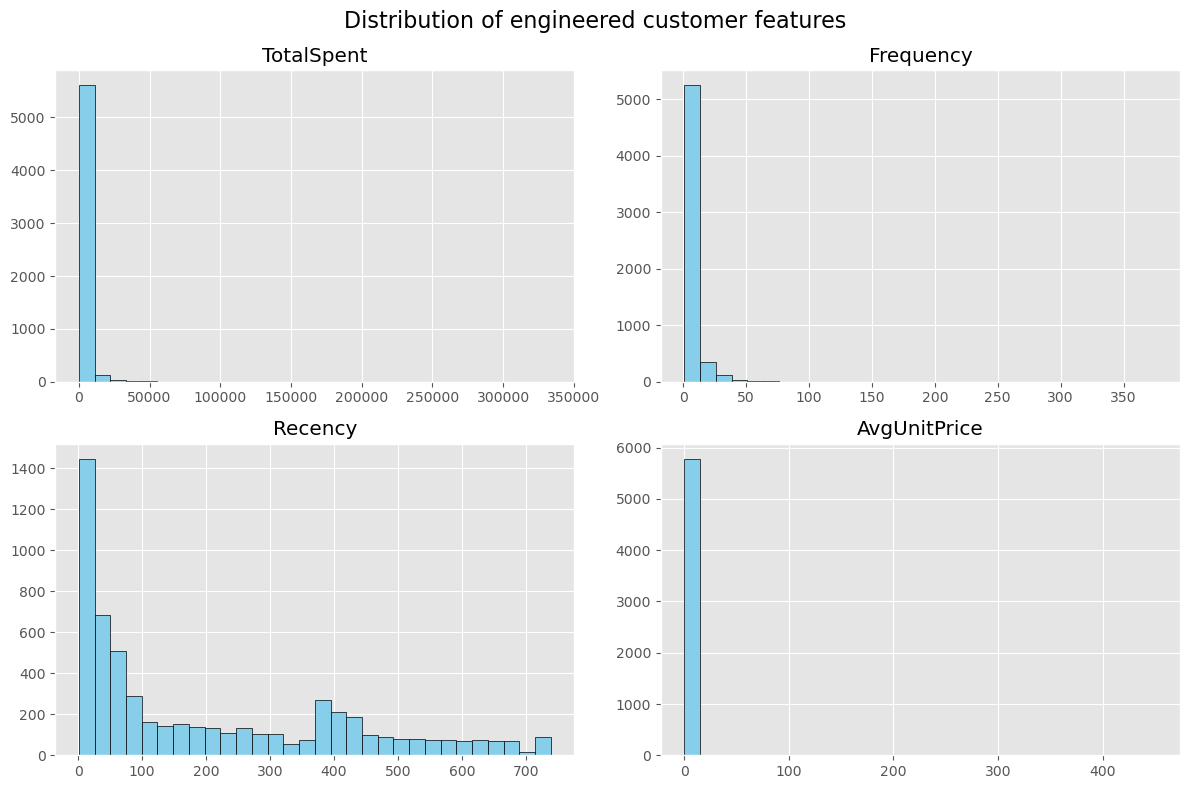

In [140]:
plt.style.use('ggplot')

features = ['TotalSpent','Frequency','Recency','AvgUnitPrice']
final_df[features].hist(bins=30,figsize=(12,8), color = 'skyblue',edgecolor = 'black')
plt.suptitle('Distribution of engineered customer features', fontsize = 16)
plt.tight_layout()
plt.show()

#Since all four engineered features (TotalSpent, Frequency, Recency, AvgUnitPrice) have highly skewed distributions, a log transformation will be applied first to reduce the impact of extreme values and bring the distributions closer to normal. After the transformation, I will use a Scaler to ensure that all features contribute equally to the clustering algorithm.

# Data Transformation

In [142]:
transformed_df = final_df.copy()
transformed_df["TotalSpent"] = np.log1p(transformed_df["TotalSpent"])
transformed_df["Frequency"] = np.log1p(transformed_df["Frequency"])
transformed_df["Recency"] = np.log1p(transformed_df["Recency"])
transformed_df["AvgUnitPrice"] = np.log1p(transformed_df["AvgUnitPrice"])


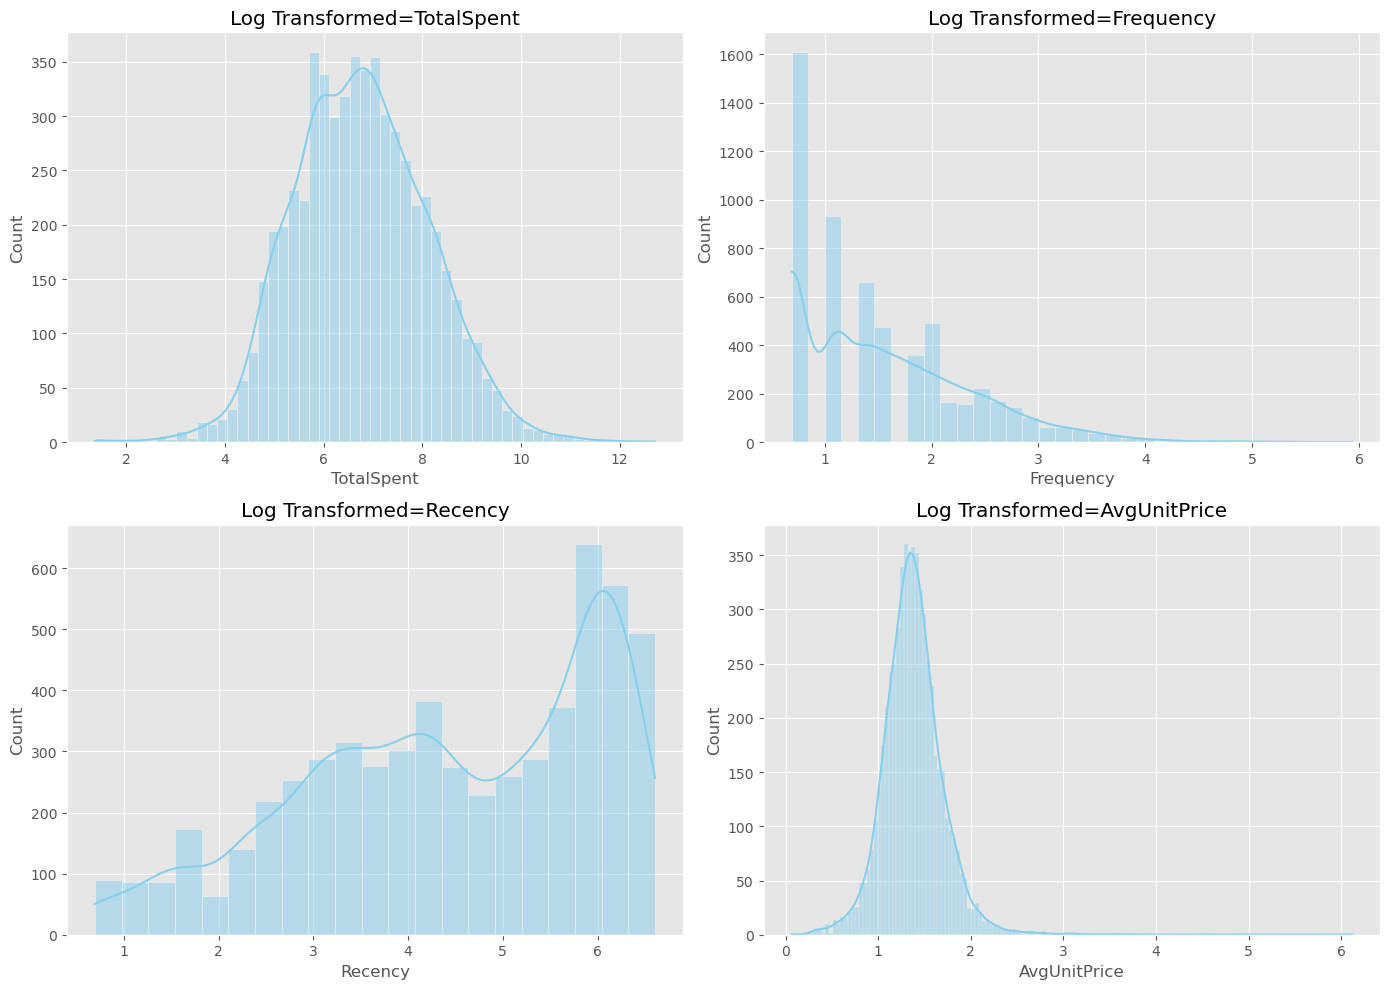

In [143]:
plt.figure(figsize = (14,10))

for i,col in enumerate(transformed_df.columns,1):
    plt.subplot(2,2,i)
    sns.histplot(transformed_df[col], kde = True, color = 'skyblue')
    plt.title(f"Log Transformed={col}")

plt.tight_layout()
plt.show()

Now that the distributions are better, the next step is to scale the features to ensure they all contribute equally to the clustering distance calculations.

# Data Scaling

In [144]:
# Standard scaling
scaled_df_standard = transformed_df.copy()
scaler_standard = StandardScaler()
scaled_features_standard = scaler_standard.fit_transform(scaled_df_standard)
scaled_df_standard = pd.DataFrame(scaled_features_standard , columns = transformed_df.columns)
scaled_df_standard.describe()

,TotalSpent,Frequency,Recency,AvgUnitPrice
count,5.803000e+03,5.803000e+03,5.803000e+03,5.803000e+03
mean,2.791724e-16,8.662915e-17,-1.726461e-16,3.422311e-16
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-3.974614e+00,-1.058562e+00,-2.413764e+00,-3.959250e+00
25%,-7.053494e-01,-1.058562e+00,-7.424044e-01,-5.813913e-01
50%,-3.053284e-02,-1.966331e-01,7.884530e-02,-4.889522e-02
75%,6.656656e-01,6.652957e-01,9.556977e-01,5.122303e-01
max,4.385441e+00,5.456259e+00,1.383688e+00,1.429792e+01


In [146]:
# RobustScaler
scaled_df_robust = transformed_df.copy()

scaler_robust = RobustScaler()
scaled_features_robust = scaler_robust.fit_transform(scaled_df_robust)

scaled_df_robust = pd.DataFrame(scaled_features_robust, columns=transformed_df.columns)

scaled_df_robust.describe()

,TotalSpent,Frequency,Recency,AvgUnitPrice
count,5803.000000,5803.000000,5803.000000,5803.000000
mean,0.022270,0.114066,-0.046431,0.044709
std,0.729449,0.580144,0.588943,0.914472
min,-2.876760,-0.500000,-1.467879,-3.575601
25%,-0.492202,-0.500000,-0.483628,-0.486911
50%,0.000000,0.000000,0.000000,0.000000
75%,0.507798,0.500000,0.516372,0.513089
max,3.220952,3.279210,0.768412,13.118625


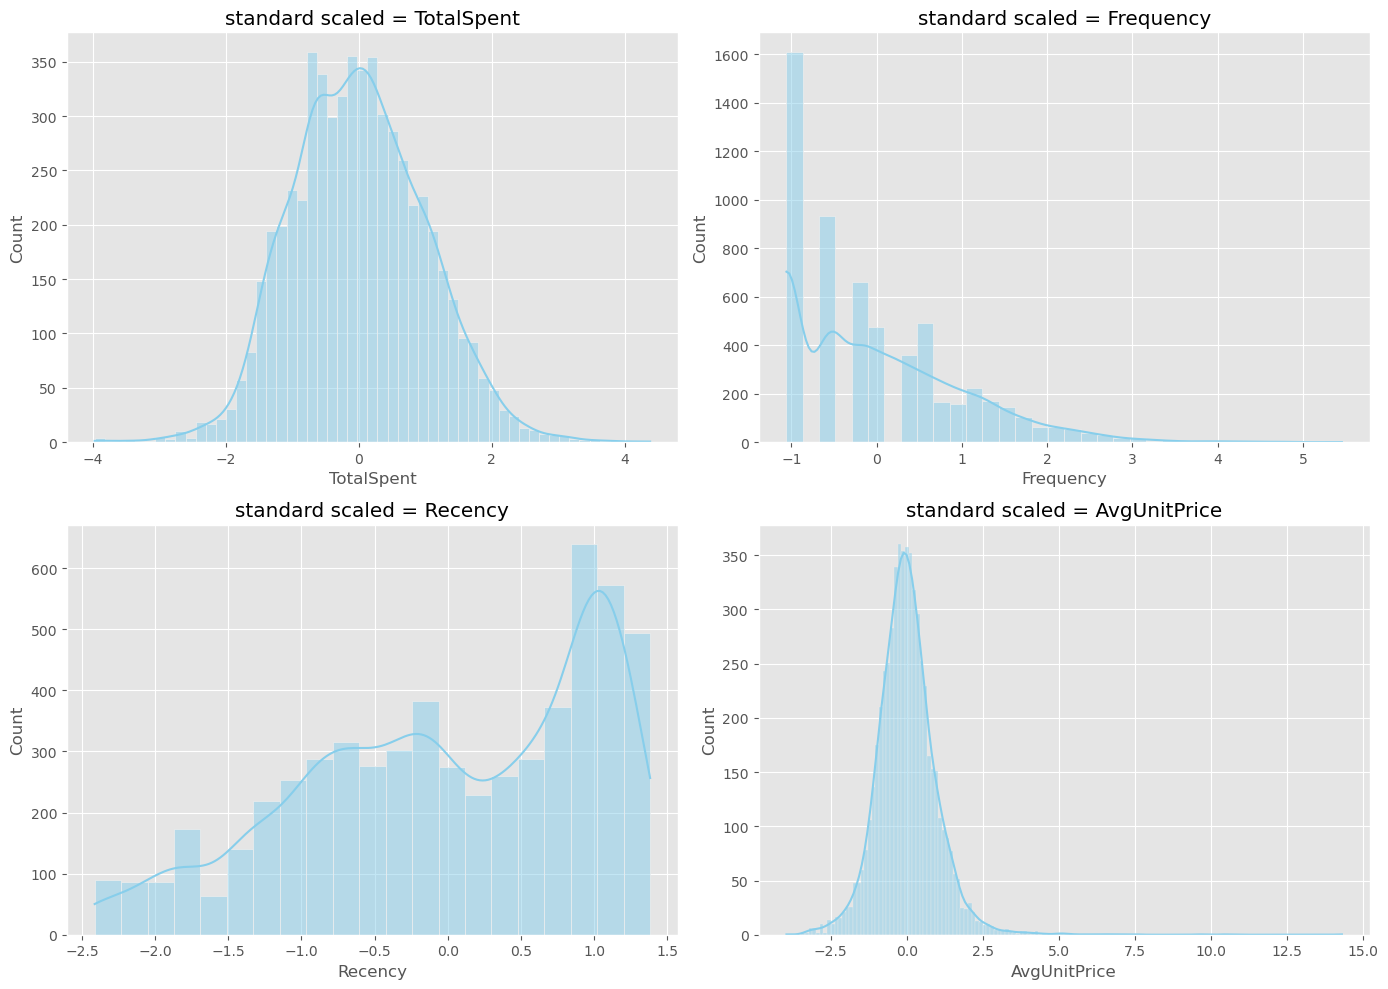

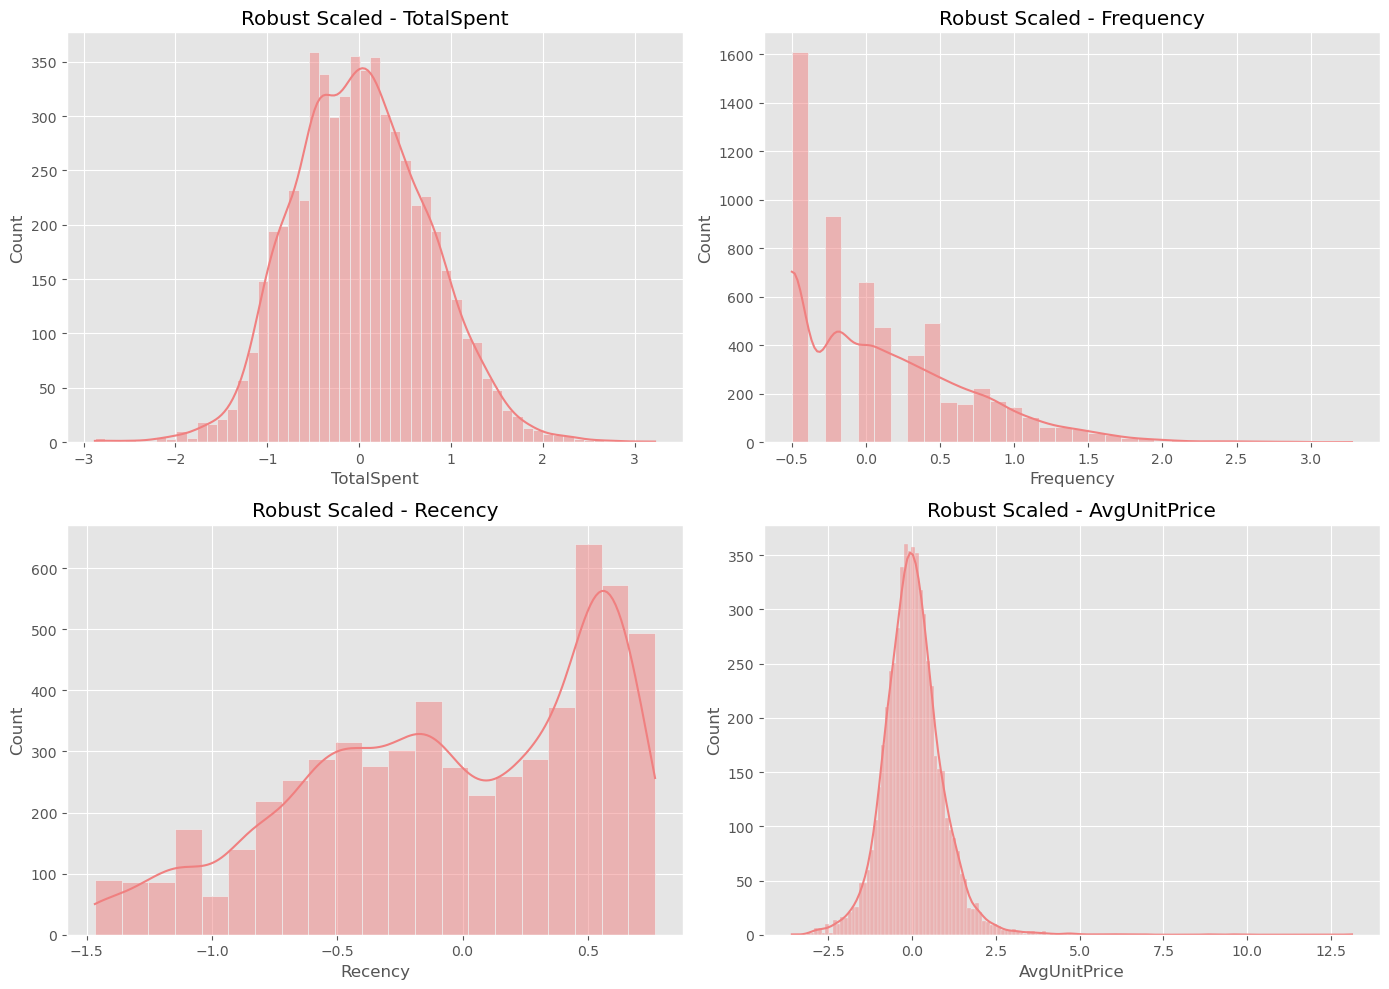

In [148]:
# plot standard scale data 
plt.figure(figsize= (14,10))
for i , col in enumerate(scaled_df_standard.columns, 1):
    plt.subplot(2,2,i)
    sns.histplot(scaled_df_standard[col], kde= True, color = 'skyblue')
    plt.title(f'standard scaled = {col}')
plt.tight_layout()
plt.show()
# Plot Robust Scaled data
plt.figure(figsize=(14, 10))
for i, col in enumerate(scaled_df_robust.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(scaled_df_robust[col], kde=True, color="lightcoral")
    plt.title(f"Robust Scaled - {col}")

plt.tight_layout()
plt.show()    

I will choose RobustScaler for feature scaling because it reduces the impact of extreme values, resulting in more balanced clusters, which is especially important given the right-skewed distributions in TotalSpent and Frequency.

# Applying t-SNE to the scaled data

In [151]:
tsne = TSNE(n_components = 2, random_state = 42, perplexity = 30, max_iter= 1000)
X_tsne = tsne.fit_transform(scaled_df_robust)

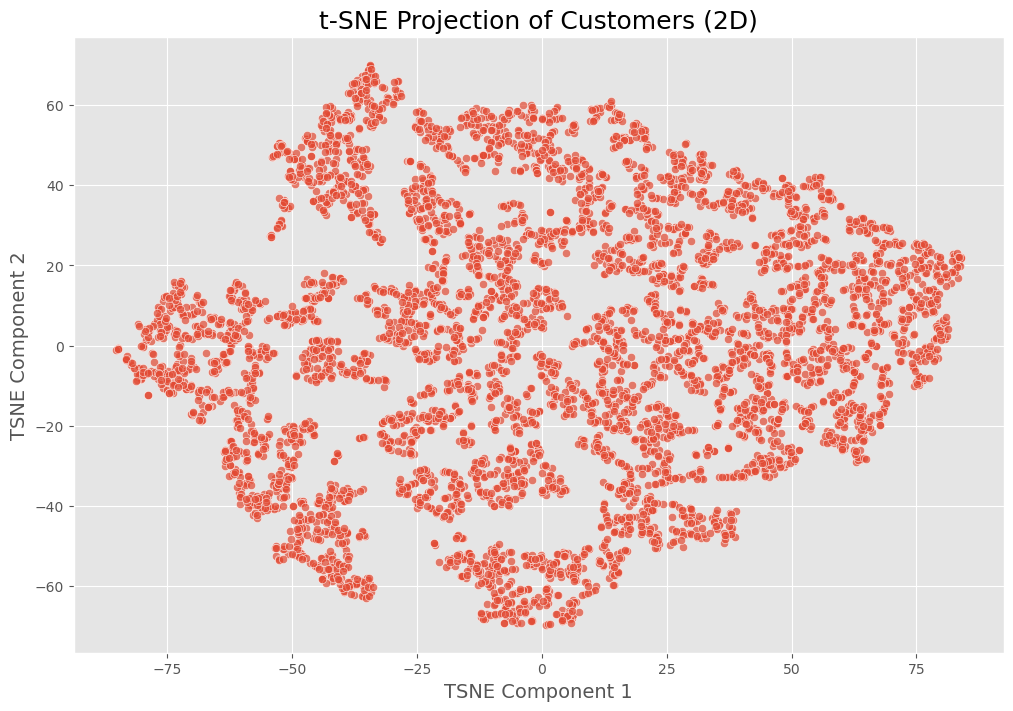

In [152]:
tsne_df = pd.DataFrame(X_tsne, columns=["TSNE_1", "TSNE_2"])

plt.figure(figsize=(12, 8))
sns.scatterplot(x="TSNE_1", y="TSNE_2", data=tsne_df, alpha=0.7)
plt.title("t-SNE Projection of Customers (2D)", fontsize=18)
plt.xlabel("TSNE Component 1", fontsize=14)
plt.ylabel("TSNE Component 2", fontsize=14)
plt.grid(True)
plt.show()

The t-SNE 2D projection reveals a more complex, non-linear structure in the customer data, suggesting potential subclusters within the overall distribution.

I initially planned to experiment with t-SNE in more detail, testing different perplexity and learning rate combinations, but it required too much computation time, so I will proceed with Agglomerative Clustering, followed by PCA, and then decide if DBSCAN is necessary before finalizing with K-Means.

6. Agglomerative Clustering

In [153]:
X = scaled_df_robust.copy()

In [154]:
#  Testing different n_clusters


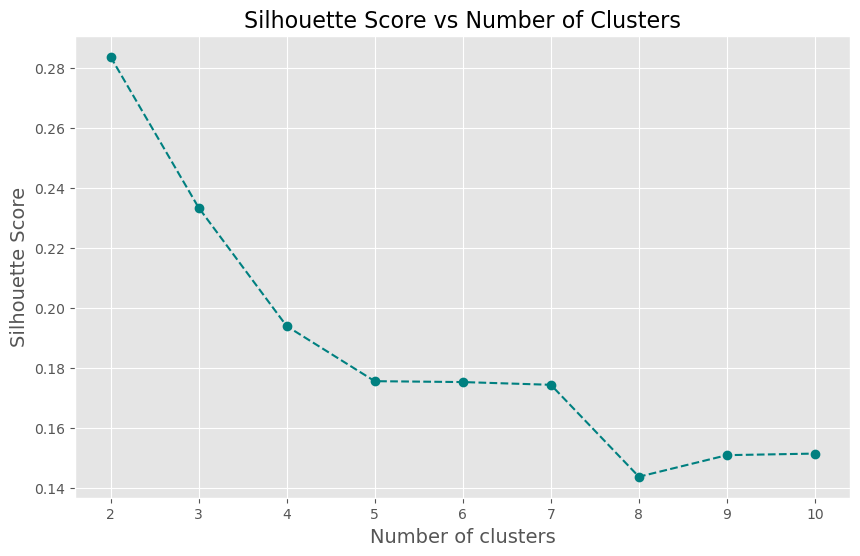

Optimal number of clusters: 2 with Silhouette Score: 0.2836


In [155]:
range_n = range(2, 11)
sil_scores = []

for n in range_n:
    model = AgglomerativeClustering(n_clusters=n, linkage="ward")
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)

    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
    else:
        score = -1  # Invalid silhouette score for single cluster
    
    sil_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range_n, sil_scores, marker="o", linestyle="--", color="teal")
plt.title("Silhouette Score vs Number of Clusters", fontsize=16)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.grid(True)
plt.show()

optimal_clusters = range_n[np.argmax(sil_scores)]
print(f"Optimal number of clusters: {optimal_clusters} with Silhouette Score: {max(sil_scores):.4f}")


Although the highest Silhouette Score was achieved with 2 clusters, I will proceed with 3 clusters to better capture the distinct behaviors of VIP customers with high spending, as well as the majority of regular customers.

In [ ]:

'''linnkage Type	Description
ward	        Minimizes the variance within clusters (most common).
complete	    Uses the maximum distance between points in clusters.
average	        Uses the average distance between all points in clusters.
single	        Uses the minimum distance between points in clusters.'''

In [156]:
linkage_methods = ["ward", "average", "complete", "single"]
distance_metrics = ["euclidean", "manhattan", "cosine"]
scores = {}

for method in linkage_methods:
    for metric in distance_metrics:
        if method == "ward" and metric != "euclidean":
            continue
        
        model = AgglomerativeClustering(n_clusters=3, linkage=method, metric=metric if method != "ward" else "euclidean")
        labels = model.fit_predict(X)
        
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            scores[(method, metric)] = score
        else:
            scores[(method, metric)] = -1

print("Silhouette Scores by linkage method and distance metric:")
for (method, metric), score in scores.items():
    print(f"{method} + {metric}: {score:.4f}")

Silhouette Scores by linkage method and distance metric:
ward + euclidean: 0.2334
average + euclidean: 0.5948
average + manhattan: 0.5630
average + cosine: 0.2683
complete + euclidean: 0.2694
complete + manhattan: 0.2383
complete + cosine: 0.1202
single + euclidean: 0.8031
single + manhattan: 0.8031
single + cosine: -0.3087



Best combination: single + euclidean


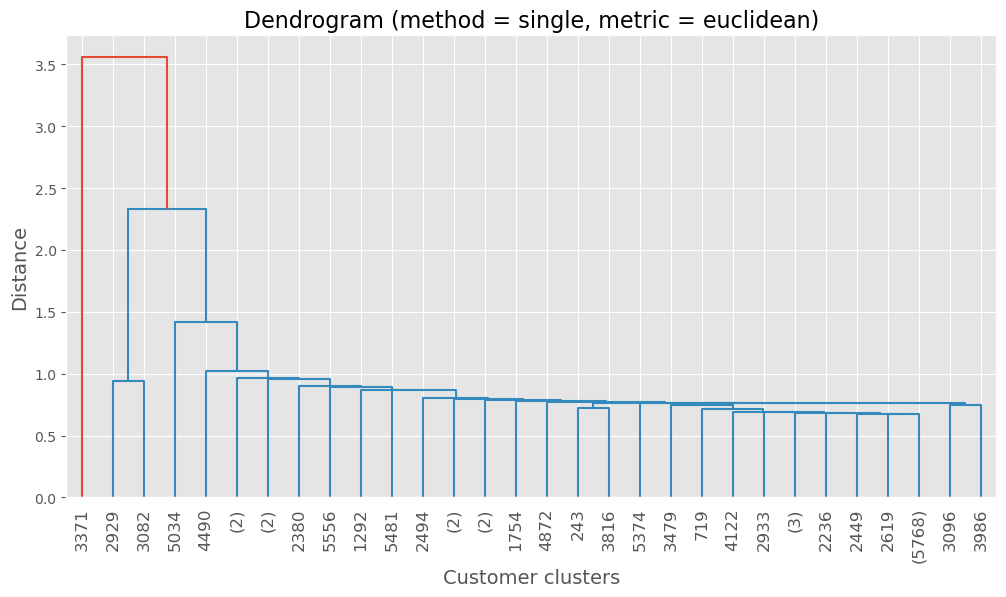

In [157]:
best_combination = max(scores, key=scores.get)
best_method, best_metric = best_combination
print(f"\nBest combination: {best_method} + {best_metric}")

if best_metric == "manhattan":
    distance_matrix = pdist(X, metric="cityblock")
elif best_metric == "cosine":
    distance_matrix = pdist(X, metric="cosine")
else:
    distance_matrix = pdist(X, metric=best_metric)

linkage_matrix = linkage(distance_matrix, method=best_method)

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode="lastp", p=30, leaf_rotation=90, leaf_font_size=12)
plt.title(f"Dendrogram (method = {best_method}, metric = {best_metric})", fontsize=16)
plt.xlabel("Customer clusters", fontsize=14)
plt.ylabel("Distance", fontsize=14)
plt.show()

Since the dendrogram clearly indicates hierarchical structures, the next step is to cut the tree at an optimal height to form distinct customer clusters for further analysis.

In [158]:
num_clusters = 3

cluster_labels = fcluster(linkage_matrix, num_clusters, criterion="maxclust")

clustered_df = scaled_df_robust.copy()
clustered_df["Cluster"] = cluster_labels

cluster_counts = clustered_df["Cluster"].value_counts().sort_index()
print("\nCluster Distribution:")
print(cluster_counts)

cluster_summary = clustered_df.groupby("Cluster").agg({
    "TotalSpent": ["mean", "median", "std", "min", "max"],
    "Frequency": ["mean", "median", "std", "min", "max"],
    "Recency": ["mean", "median", "std", "min", "max"],
    "AvgUnitPrice": ["mean", "median", "std", "min", "max"]
})

cluster_summary



Cluster Distribution:
Cluster
1       2
2    5800
3       1
Name: count, dtype: int64


TotalSpent                                         Frequency         \
              mean    median       std       min       max      mean median   
Cluster                                                                       
1        -0.606355 -0.606355  0.048762 -0.640834 -0.571875 -0.250000  -0.25   
2         0.022547  0.000483  0.729530 -2.876760  3.220952  0.114297   0.00   
3        -0.324513 -0.324513       NaN -0.324513 -0.324513 -0.500000  -0.50   

                                  Recency                                \
              std  min      max      mean    median       std       min   
Cluster                                                                   
1        0.353553 -0.5  0.00000  0.578461  0.578461  0.160025  0.465306   
2        0.580180 -0.5  3.27921 -0.046681 -0.001959  0.588972 -1.467879   
3             NaN -0.5 -0.50000  0.149415  0.149415       NaN  0.149415   

                  AvgUnitPrice                                             
              max         mean     median       std        min        max  
Cluster                                                                    
1        0.691616     9.211205   9.211205  0.534929   8.832953   9.589456  
2        0.768412     0.039294  -0.000179  0.882133  -3.575601   6.903440  
3        0.149415    13.118625  13.118625       NaN  13.118625  13.118625


Looking for the characteristics of the customers in each cluster.

In [159]:
cluster_1_customers = clustered_df[clustered_df["Cluster"] == 1]
cluster_2_customers = clustered_df[clustered_df["Cluster"] == 2]
cluster_3_customer = clustered_df[clustered_df["Cluster"] == 3]

print("\nCluster 1 Customers:")
display(cluster_1_customers.describe())

print("\nCluster 2 Customers:")
display(cluster_2_customers.describe())

print("\nCluster 3 Customer:")
display(cluster_3_customer)


Cluster 1 Customers:


,TotalSpent,Frequency,Recency,AvgUnitPrice,Cluster
count,2.000000,2.000000,2.000000,2.000000,2.0
mean,-0.606355,-0.250000,0.578461,9.211205,1.0
std,0.048762,0.353553,0.160025,0.534929,0.0
min,-0.640834,-0.500000,0.465306,8.832953,1.0
25%,-0.623594,-0.375000,0.521883,9.022079,1.0
50%,-0.606355,-0.250000,0.578461,9.211205,1.0
75%,-0.589115,-0.125000,0.635038,9.400331,1.0
max,-0.571875,0.000000,0.691616,9.589456,1.0



Cluster 2 Customers:


,TotalSpent,Frequency,Recency,AvgUnitPrice,Cluster
count,5800.000000,5800.000000,5800.000000,5800.000000,5800.0
mean,0.022547,0.114297,-0.046681,0.039294,2.0
std,0.729530,0.580180,0.588972,0.882133,0.0
min,-2.876760,-0.500000,-1.467879,-3.575601,2.0
25%,-0.492101,-0.500000,-0.483628,-0.487234,2.0
50%,0.000483,0.000000,-0.001959,-0.000179,2.0
75%,0.508142,0.500000,0.516372,0.512485,2.0
max,3.220952,3.279210,0.768412,6.903440,2.0



Cluster 3 Customer:


,TotalSpent,Frequency,Recency,AvgUnitPrice,Cluster
3371,-0.324513,-0.5,0.149415,13.118625,3


While Cluster 3 contains only a single customer with highly distinct purchasing behavior and Cluster 1 represents a small group of high-frequency, moderate-spending customers, the majority of customers fall into Cluster 2, indicating a dominant segment with more standardized purchasing patterns. This distribution suggests the need for further analysis to better understand the diversity of customer behaviors within these clusters.

Distribution of Features for Cluster 1

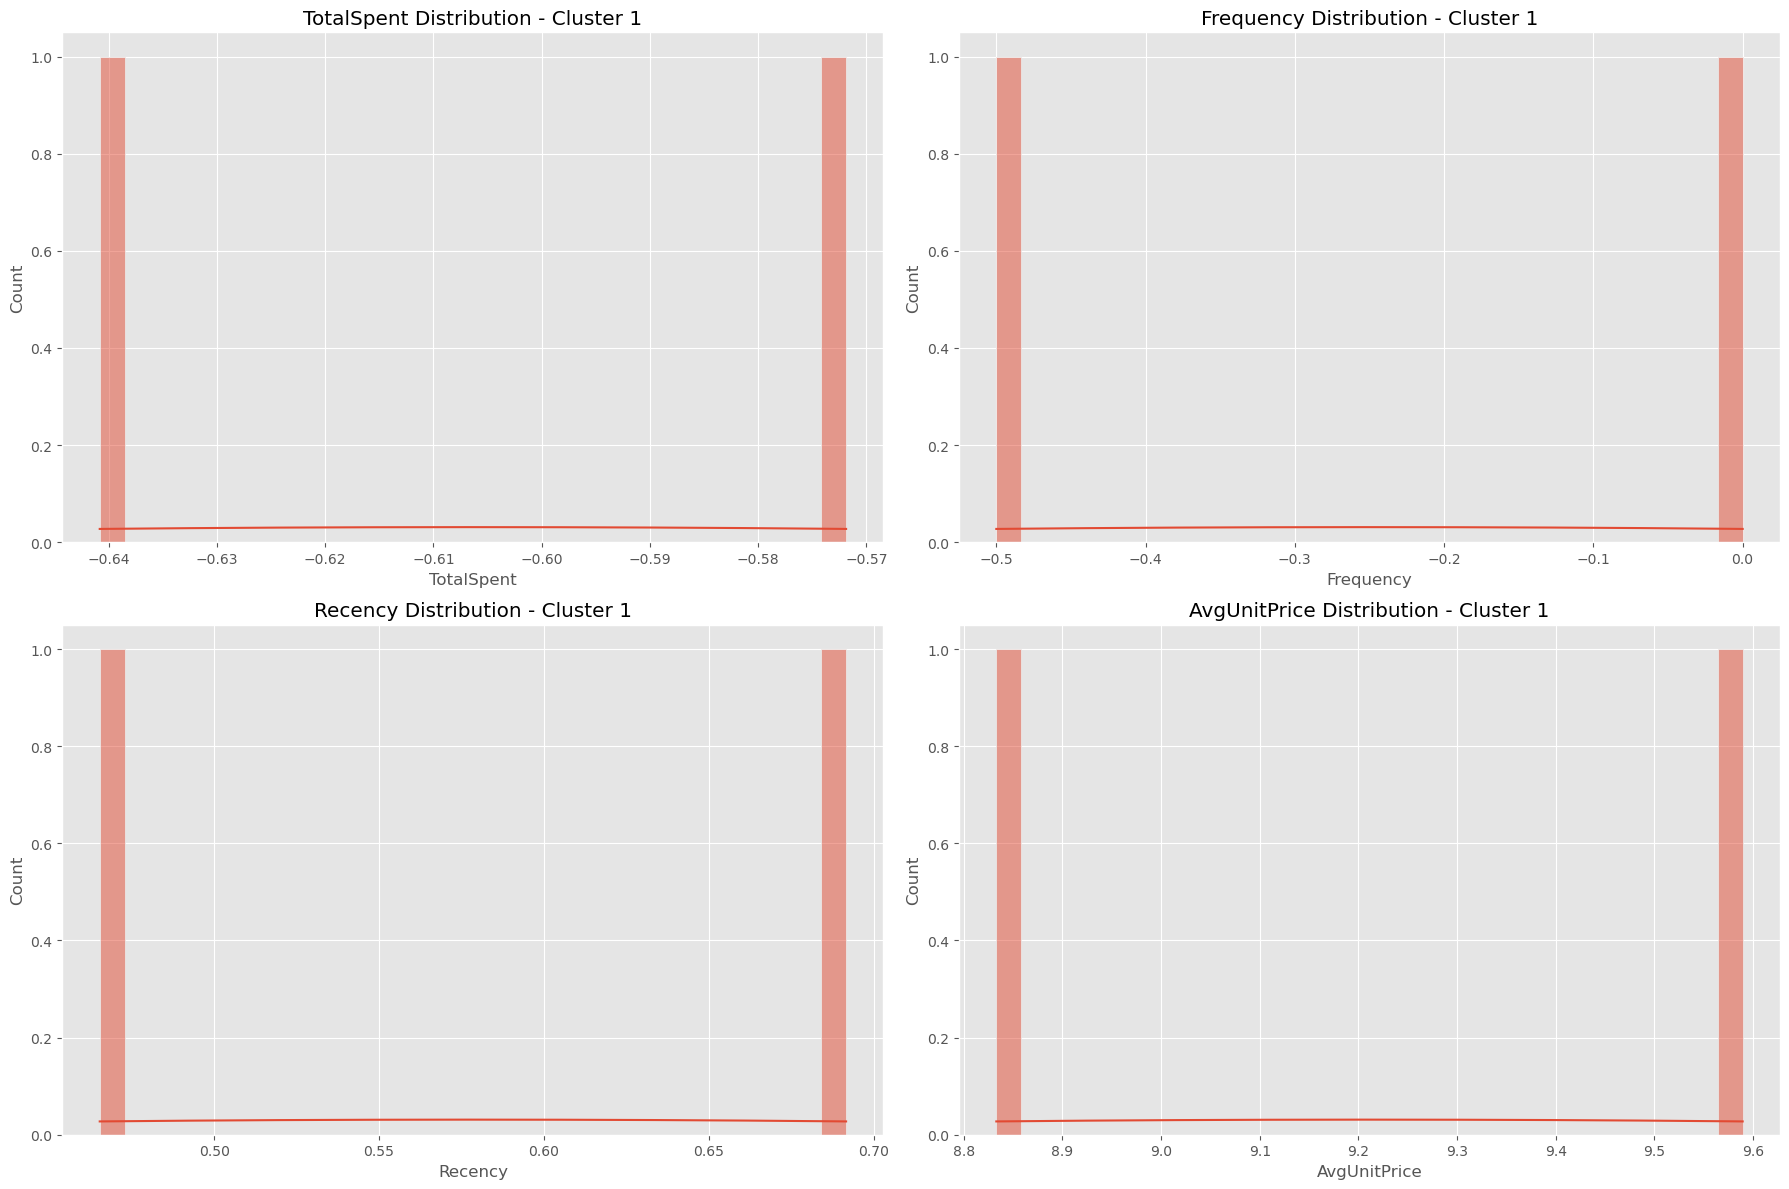

In [160]:
plt.figure(figsize=(18, 12))

# TotalSpent distribution
plt.subplot(2, 2, 1)
sns.histplot(cluster_1_customers["TotalSpent"], bins=30, kde=True)
plt.title("TotalSpent Distribution - Cluster 1")

# Frequency distribution
plt.subplot(2, 2, 2)
sns.histplot(cluster_1_customers["Frequency"], bins=30, kde=True)
plt.title("Frequency Distribution - Cluster 1")

# Recency distribution
plt.subplot(2, 2, 3)
sns.histplot(cluster_1_customers["Recency"], bins=30, kde=True)
plt.title("Recency Distribution - Cluster 1")

# AvgUnitPrice distribution
plt.subplot(2, 2, 4)
sns.histplot(cluster_1_customers["AvgUnitPrice"], bins=30, kde=True)
plt.title("AvgUnitPrice Distribution - Cluster 1")

plt.tight_layout()

Distribution of Features for Cluster 2

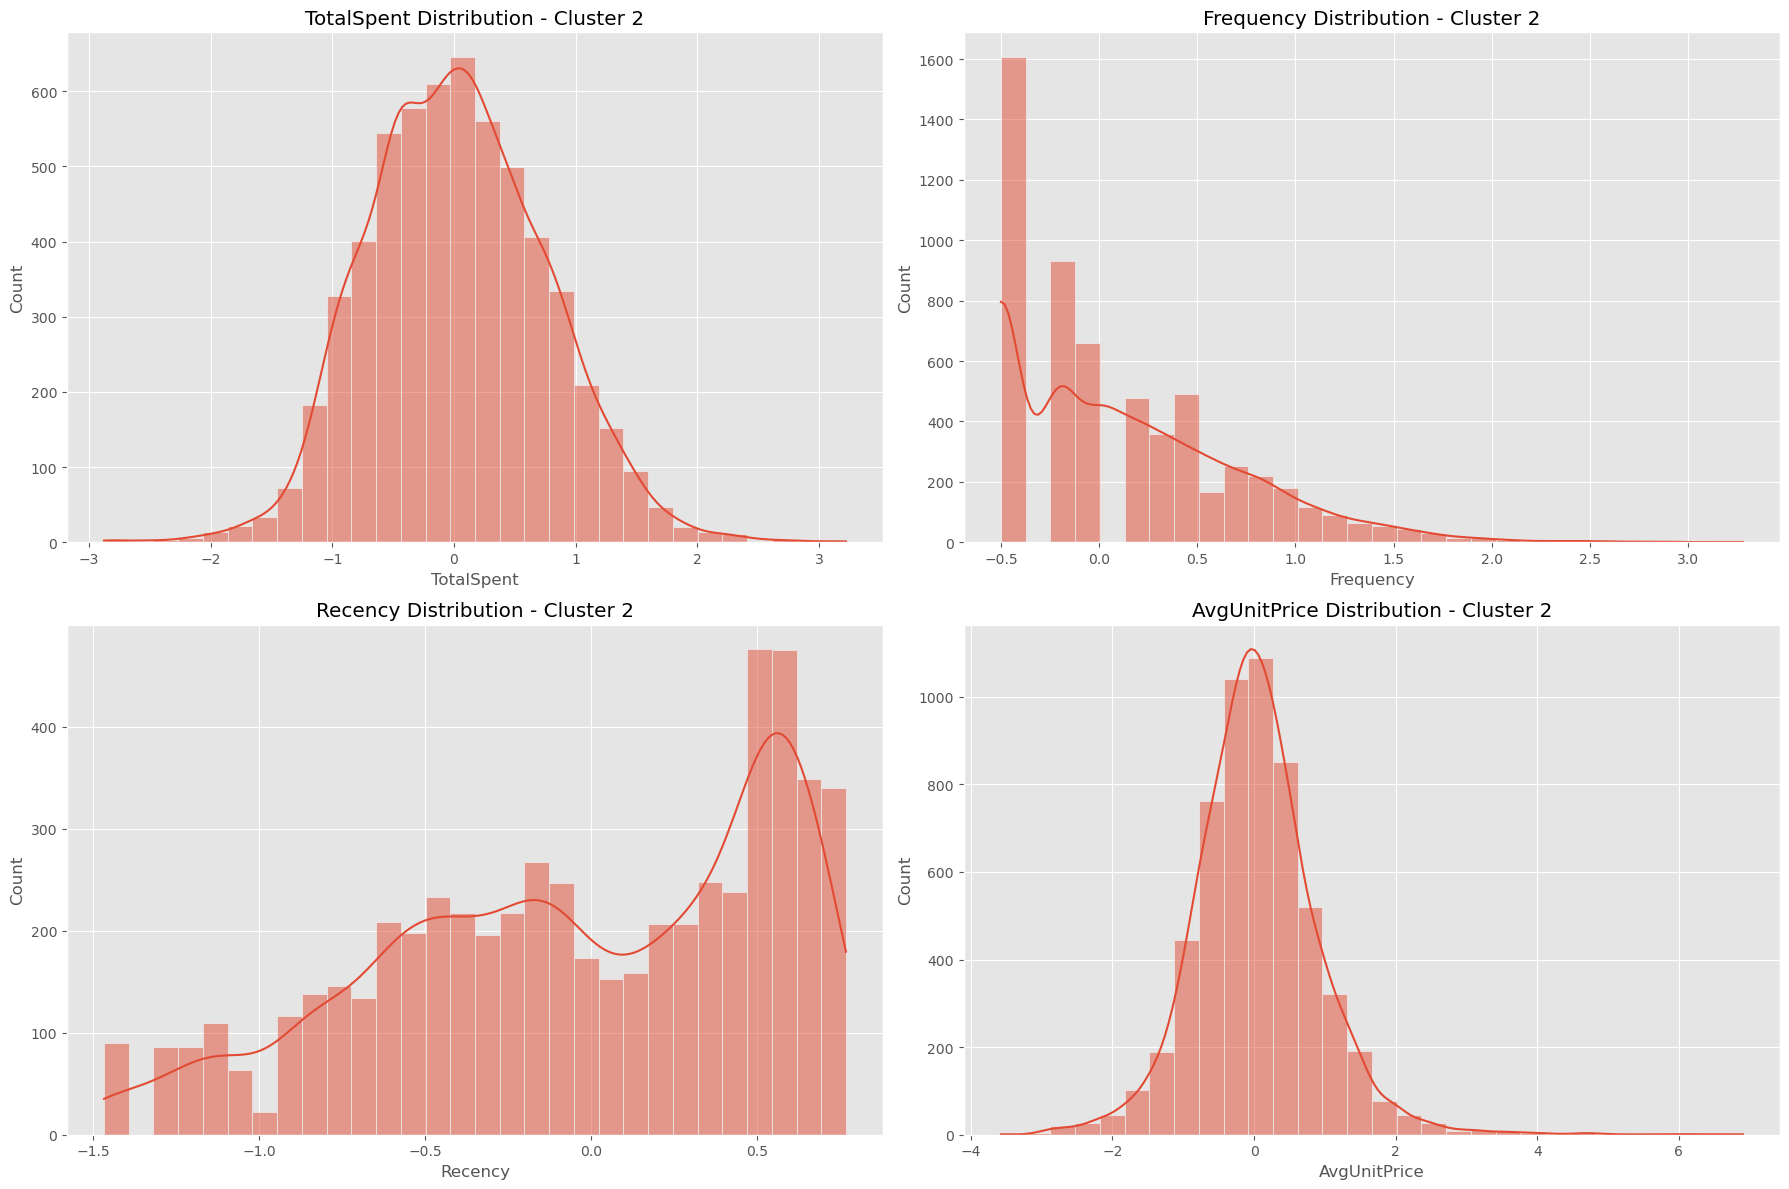

In [161]:
plt.figure(figsize=(18, 12))

# TotalSpent distribution
plt.subplot(2, 2, 1)
sns.histplot(cluster_2_customers["TotalSpent"], bins=30, kde=True)
plt.title("TotalSpent Distribution - Cluster 2")

# Frequency distribution
plt.subplot(2, 2, 2)
sns.histplot(cluster_2_customers["Frequency"], bins=30, kde=True)
plt.title("Frequency Distribution - Cluster 2")

# Recency distribution
plt.subplot(2, 2, 3)
sns.histplot(cluster_2_customers["Recency"], bins=30, kde=True)
plt.title("Recency Distribution - Cluster 2")

# AvgUnitPrice distribution
plt.subplot(2, 2, 4)
sns.histplot(cluster_2_customers["AvgUnitPrice"], bins=30, kde=True)
plt.title("AvgUnitPrice Distribution - Cluster 2")

plt.tight_layout()
plt.show()


Cluster 2 contains the majority of customers, characterized by a wide range of spending levels and lower purchase frequency, indicating a diverse group of less engaged buyers.

To further explore the hidden subgroups within this dominant Cluster 2, I will apply PCA to reduce dimensionality before attempting more precise clustering with DBSCAN.

# PCA for Dimensionality Reduction

In [165]:
cluster_2_df = clustered_df[clustered_df["Cluster"] == 2].drop("Cluster", axis=1)


In [166]:
pca = PCA(n_components = 2, random_state = 42)
X_pca_cluster_2= pca.fit_transform(cluster_2_df)

In [167]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio (Fisrt 2 Components): {explained_variance}")
print(f" Total Variance Explained: {sum(explained_variance)*100:.2f}%")

Explained Variance Ratio (Fisrt 2 Components): [0.47669068 0.39161304]
 Total Variance Explained: 86.83%


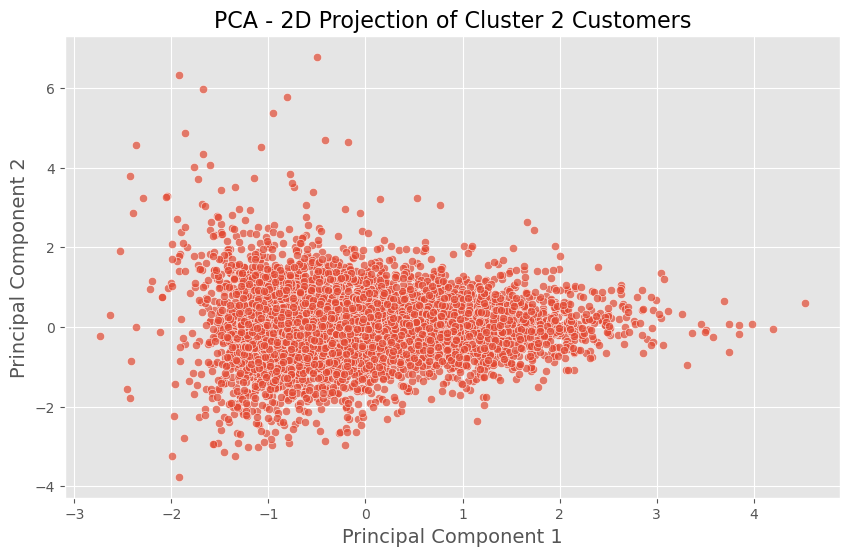

In [168]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_cluster_2[:, 0], y=X_pca_cluster_2[:, 1], alpha=0.7)
plt.title("PCA - 2D Projection of Cluster 2 Customers", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.show()

The PCA transformation for Cluster 2 successfully reduced the data to two principal components, capturing 83.78% of the total variance, providing a compact representation for further clustering analysis.

#Clustering with PCA Components

In [169]:
range_n = range(2, 11)
sil_scores = []

for n in range_n:
    model = AgglomerativeClustering(n_clusters=n, linkage="average", metric="euclidean")
    labels = model.fit_predict(X_pca_cluster_2)

    if len(set(labels)) > 1:
        score = silhouette_score(X_pca_cluster_2, labels)
        sil_scores.append(score)
    else:
        sil_scores.append(-1)

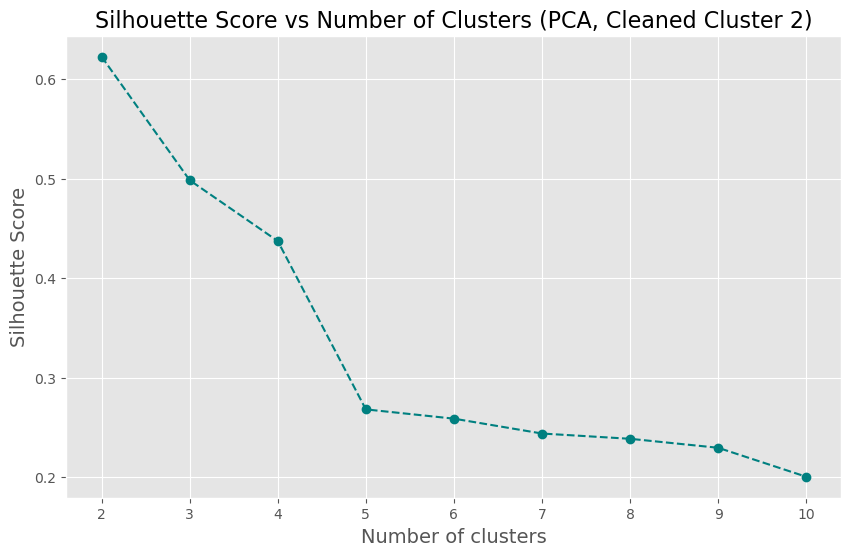

Optimal number of clusters: 2 with Silhouette Score: 0.6226


In [170]:
plt.figure(figsize=(10, 6))
plt.plot(range_n, sil_scores, marker="o", linestyle="--", color="teal")
plt.title("Silhouette Score vs Number of Clusters (PCA, Cleaned Cluster 2)", fontsize=16)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.xticks(range_n)  # Ensure each cluster number is shown
plt.grid(True)
plt.show()

optimal_clusters = range_n[sil_scores.index(max(sil_scores))]
print(f"Optimal number of clusters: {optimal_clusters} with Silhouette Score: {max(sil_scores):.4f}")

Although the initial analysis suggested 2 clusters as the optimal choice, I will also test 3 to 8 cluster configurations to capture potential subgroups and uncover more nuanced customer segments.

In [171]:
cluster_models = {
    "3 Clusters": AgglomerativeClustering(n_clusters=3, linkage="average", metric="euclidean"),
    "4 Clusters": AgglomerativeClustering(n_clusters=4, linkage="average", metric="euclidean"),
    "5 Clusters": AgglomerativeClustering(n_clusters=5, linkage="average", metric="euclidean"),
    "6 Clusters": AgglomerativeClustering(n_clusters=6, linkage="average", metric="euclidean"),
    "7 Clusters": AgglomerativeClustering(n_clusters=7, linkage="average", metric="euclidean"),
    "8 Clusters": AgglomerativeClustering(n_clusters=8, linkage="average", metric="euclidean")
}

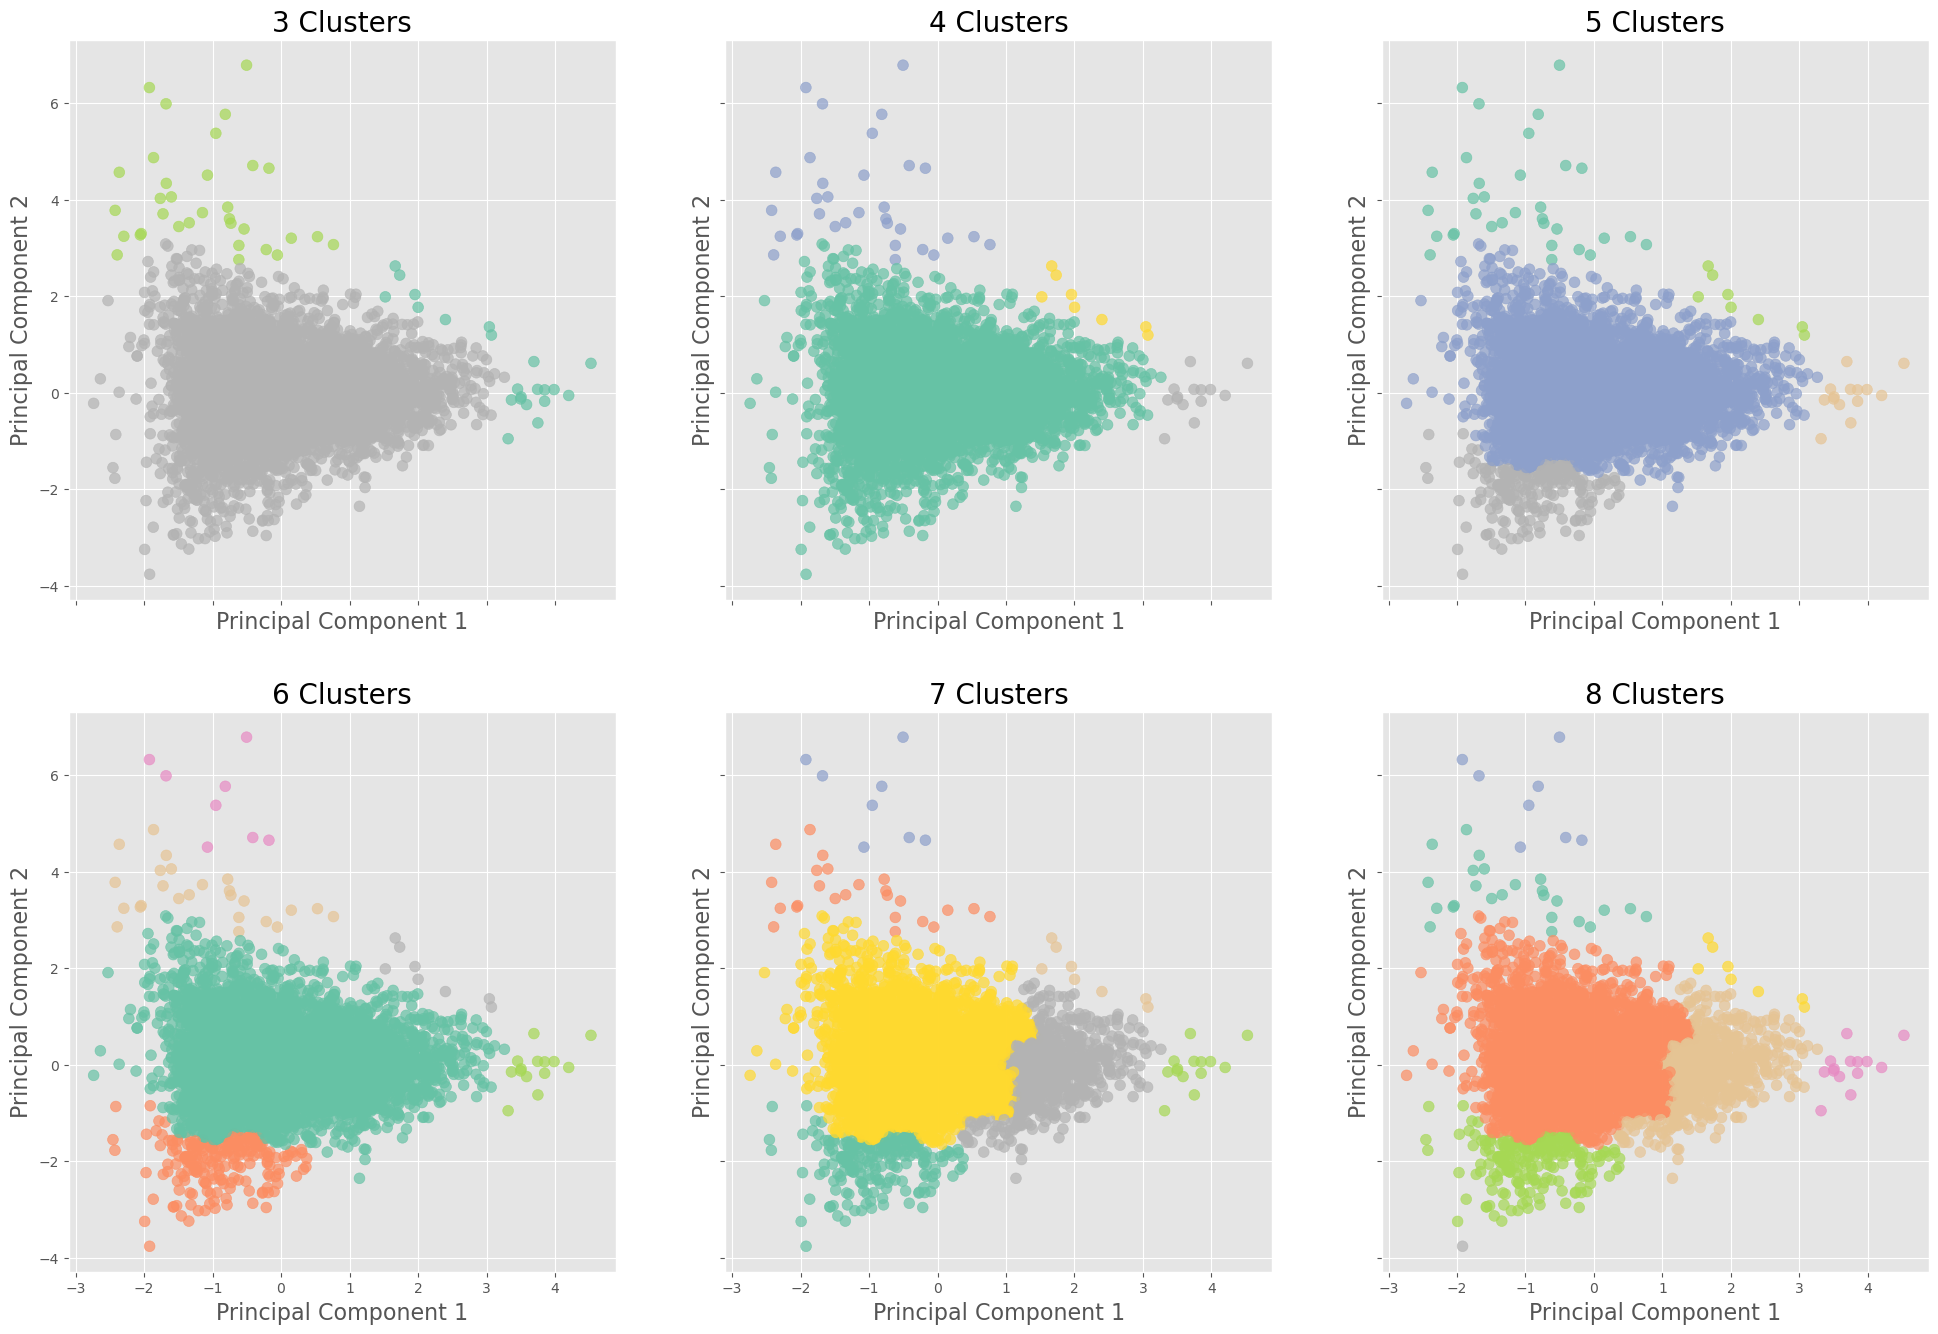

In [172]:
fig, axes = plt.subplots(2, 3, figsize=(24, 16), sharex=True, sharey=True)

for ax, (title, model) in zip(axes.flatten(), cluster_models.items()):

    labels = model.fit_predict(X_pca_cluster_2)
    
    # Plot the clusters
    ax.scatter(X_pca_cluster_2[:, 0], X_pca_cluster_2[:, 1], c=labels, cmap="Set2", alpha=0.7, s=60)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel("Principal Component 1", fontsize=16)
    ax.set_ylabel("Principal Component 2", fontsize=16)
    ax.grid(True)

plt.show()

In [173]:
# Analysing characteristics of each clusters

In [174]:
cluster_2_labels = pd.DataFrame(X_pca_cluster_2, columns=["PC1", "PC2"])

for title, model in cluster_models.items():
    labels = model.fit_predict(X_pca_cluster_2)
    cluster_2_labels[title] = labels


for title in cluster_models.keys():
    print(f"\n{title} Cluster Summary:")
    summary = cluster_2_labels.groupby(title).agg({
        "PC1": ["mean", "std", "min", "max", "count"],
        "PC2": ["mean", "std", "min", "max", "count"]
    })
    display(summary)


3 Clusters Cluster Summary:


PC1                                           PC2            \
                mean       std       min       max count      mean       std   
3 Clusters                                                                     
0           3.168582  0.885152  1.522496  4.524970    22  0.636087  1.045086   
1          -1.108067  0.865264 -2.421781  0.765373    33  4.007267  1.058745   
2          -0.005769  0.952357 -2.736061  3.261257  5745 -0.025454  0.826807   

                                      
                 min       max count  
3 Clusters                            
0          -0.954589  2.624126    22  
1           2.755940  6.784952    33  
2          -3.763341  3.080679  5745


4 Clusters Cluster Summary:


PC1                                           PC2            \
                mean       std       min       max count      mean       std   
4 Clusters                                                                     
0          -0.005769  0.952357 -2.736061  3.261257  5745 -0.025454  0.826807   
1          -1.108067  0.865264 -2.421781  0.765373    33  4.007267  1.058745   
2           2.174067  0.605153  1.522496  3.071799     8  1.864469  0.504177   
3           3.736876  0.334664  3.315246  4.524970    14 -0.065846  0.410216   

                                      
                 min       max count  
4 Clusters                            
0          -3.763341  3.080679  5745  
1           2.755940  6.784952    33  
2           1.192983  2.624126     8  
3          -0.954589  0.643530    14


5 Clusters Cluster Summary:


PC1                                           PC2            \
                mean       std       min       max count      mean       std   
5 Clusters                                                                     
0          -1.108067  0.865264 -2.421781  0.765373    33  4.007267  1.058745   
1           0.026426  0.947728 -2.736061  3.261257  5544  0.046932  0.742194   
2           2.174067  0.605153  1.522496  3.071799     8  1.864469  0.504177   
3           3.736876  0.334664  3.315246  4.524970    14 -0.065846  0.410216   
4          -0.893782  0.577973 -2.454224  0.374694   201 -2.022014  0.463665   

                                      
                 min       max count  
5 Clusters                            
0           2.755940  6.784952    33  
1          -2.355413  3.080679  5544  
2           1.192983  2.624126     8  
3          -0.954589  0.643530    14  
4          -3.763341 -0.851372   201


6 Clusters Cluster Summary:


PC1                                           PC2            \
                mean       std       min       max count      mean       std   
6 Clusters                                                                     
0           0.026426  0.947728 -2.736061  3.261257  5544  0.046932  0.742194   
1          -0.893782  0.577973 -2.454224  0.374694   201 -2.022014  0.463665   
2          -0.941780  0.608878 -1.921832 -0.176832     8  5.511583  0.844046   
3           3.736876  0.334664  3.315246  4.524970    14 -0.065846  0.410216   
4          -1.161279  0.936987 -2.421781  0.765373    25  3.525886  0.539533   
5           2.174067  0.605153  1.522496  3.071799     8  1.864469  0.504177   

                                      
                 min       max count  
6 Clusters                            
0          -2.355413  3.080679  5544  
1          -3.763341 -0.851372   201  
2           4.506431  6.784952     8  
3          -0.954589  0.643530    14  
4           2.755940  4.869311    25  
5           1.192983  2.624126     8


7 Clusters Cluster Summary:


PC1                                           PC2            \
                mean       std       min       max count      mean       std   
7 Clusters                                                                     
0          -0.893782  0.577973 -2.454224  0.374694   201 -2.022014  0.463665   
1          -1.161279  0.936987 -2.421781  0.765373    25  3.525886  0.539533   
2          -0.941780  0.608878 -1.921832 -0.176832     8  5.511583  0.844046   
3           3.736876  0.334664  3.315246  4.524970    14 -0.065846  0.410216   
4          -0.237001  0.720667 -2.736061  1.459154  4755  0.070953  0.758869   
5           2.174067  0.605153  1.522496  3.071799     8  1.864469  0.504177   
6           1.614005  0.492385  0.363863  3.261257   789 -0.097833  0.613254   

                                      
                 min       max count  
7 Clusters                            
0          -3.763341 -0.851372   201  
1           2.755940  4.869311    25  
2           4.506431  6.784952     8  
3          -0.954589  0.643530    14  
4          -1.649422  3.080679  4755  
5           1.192983  2.624126     8  
6          -2.355413  1.685696   789


8 Clusters Cluster Summary:


PC1                                           PC2            \
                mean       std       min       max count      mean       std   
8 Clusters                                                                     
0          -1.161279  0.936987 -2.421781  0.765373    25  3.525886  0.539533   
1          -0.237001  0.720667 -2.736061  1.459154  4755  0.070953  0.758869   
2          -0.941780  0.608878 -1.921832 -0.176832     8  5.511583  0.844046   
3           3.736876  0.334664  3.315246  4.524970    14 -0.065846  0.410216   
4          -0.888657  0.574826 -2.454224  0.374694   200 -2.013307  0.448053   
5           2.174067  0.605153  1.522496  3.071799     8  1.864469  0.504177   
6           1.614005  0.492385  0.363863  3.261257   789 -0.097833  0.613254   
7          -1.918825       NaN -1.918825 -1.918825     1 -3.763341       NaN   

                                      
                 min       max count  
8 Clusters                            
0           2.755940  4.869311    25  
1          -1.649422  3.080679  4755  
2           4.506431  6.784952     8  
3          -0.954589  0.643530    14  
4          -3.248123 -0.851372   200  
5           1.192983  2.624126     8  
6          -2.355413  1.685696   789  
7          -3.763341 -3.763341     1

As the number of clusters increases from 3 to 8, several small clusters emerge, some of which contain only a single point or very few observations, indicating potential outliers. The larger, dense clusters tend to remain stable across different configurations, suggesting that the core structure of the data is well-represented even with fewer clusters. However, the presence of these smaller clusters indicates that the data contains several niche groups, which may require more precise segmentation or outlier removal to improve overall clustering quality.

DBSCAN on Cluster 2

Finding the Optimal eps with k-Distance Graph

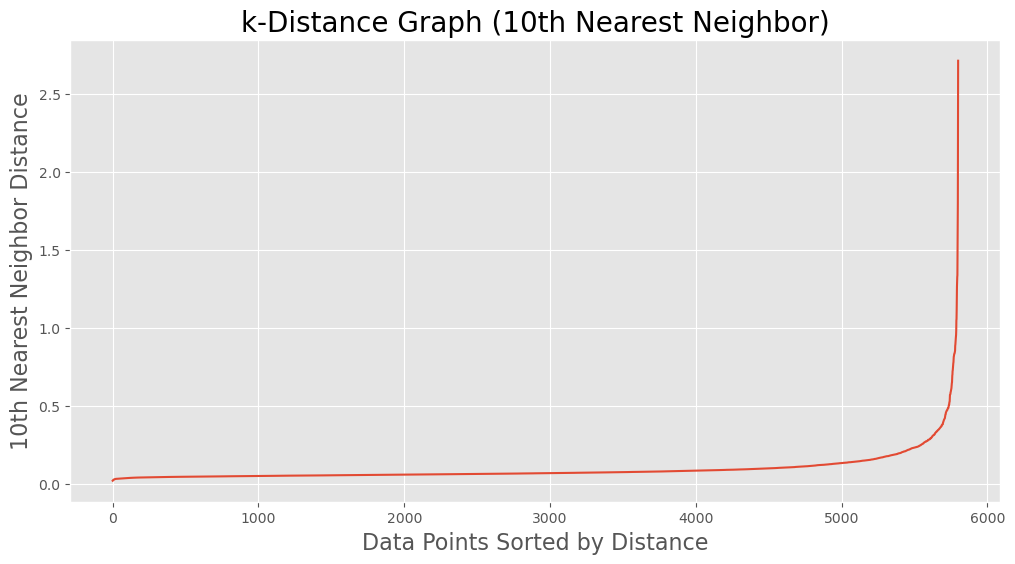

In [175]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_pca_cluster_2)
distances, indices = neighbors_fit.kneighbors(X_pca_cluster_2)

distances = np.sort(distances[:, 9])  # 10th nearest neighbor distance
plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.title("k-Distance Graph (10th Nearest Neighbor)", fontsize=20)
plt.xlabel("Data Points Sorted by Distance", fontsize=16)
plt.ylabel("10th Nearest Neighbor Distance", fontsize=16)
plt.grid(True)
plt.show()

We can see a sharp increase starting around 0.5 to 1.2, indicating a potential eps value within this range.

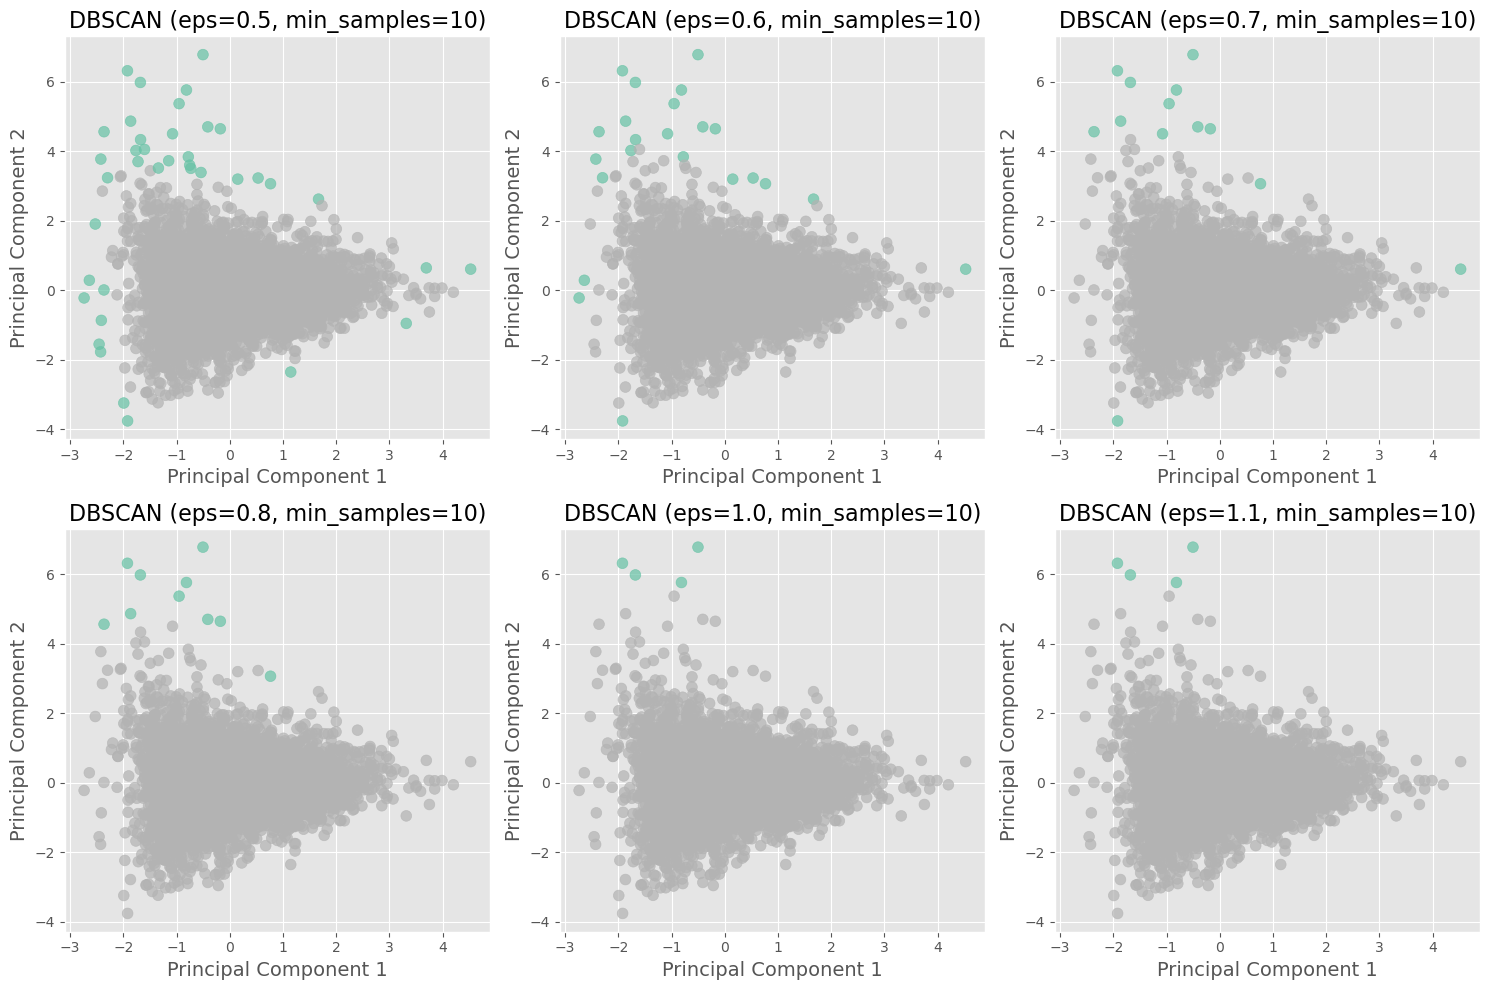

In [176]:
eps_values = [0.5, 0.6, 0.7, 0.8, 1.0, 1.1]
min_samples = 10

plt.figure(figsize=(15, 10))

for i, eps in enumerate(eps_values, 1):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_pca_cluster_2)
    
    plt.subplot(2, 3, i)
    plt.scatter(X_pca_cluster_2[:, 0], X_pca_cluster_2[:, 1], c=labels, cmap="Set2", alpha=0.7, s=60)
    plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})", fontsize=16)
    plt.xlabel("Principal Component 1", fontsize=14)
    plt.ylabel("Principal Component 2", fontsize=14)
    plt.grid(True)

plt.tight_layout()
plt.show()

The DBSCAN clustering approach was tested with various epsilon values ranging from 0.5 to 1.1, revealing that the algorithm struggles to identify meaningful clusters within this dataset. At lower epsilon values, only a few sparse points are identified as clusters, while at higher values (eps=1.1), the entire dataset is classified as a single dense cluster. This indicates that the structure within this dataset may not be well-suited for DBSCAN, potentially due to the high density and compact distribution of the majority of the data points after PCA.

7. KMeans Clustering

In [177]:
!pip install kneed

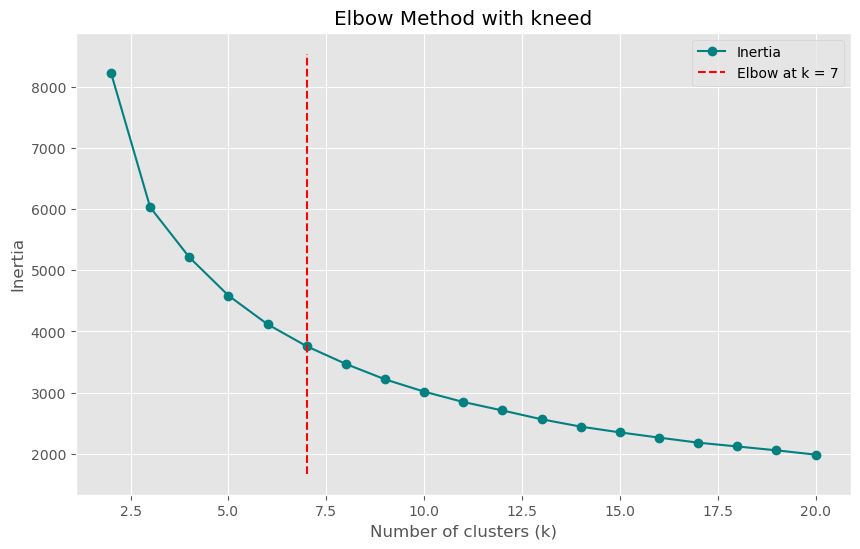

In [178]:
from kneed import KneeLocator

inertia = []
k_values = range(2, 21)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df_robust)
    inertia.append(kmeans.inertia_)

knee = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o',color="teal", label="Inertia")
plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles="--", colors='red', label=f"Elbow at k = {knee.knee}")
plt.title("Elbow Method with kneed")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.legend()
plt.grid(True)
plt.show()


In [179]:
kmeans = KMeans(n_clusters=knee.knee, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df_robust)

final_df["cluster_kmeans"] = kmeans_labels

In [180]:

final_df

,TotalSpent,Frequency,Recency,AvgUnitPrice,cluster_kmeans
CustomerID,,,,,
12346.0,372.86,11,529,6.253333,3
12347.0,4671.93,8,2,2.504661,1
12348.0,1057.24,5,75,0.789722,2
12349.0,3481.99,3,19,3.778639,6
12350.0,294.40,1,310,1.581250,2
...,...,...,...,...,...
18283.0,2664.90,22,4,1.760768,1
18284.0,411.68,1,432,1.521852,2
18285.0,377.00,1,661,4.563636,3


In [181]:
final_df["cluster_kmeans"] = final_df["cluster_kmeans"] + 1

In [182]:

final_df

,TotalSpent,Frequency,Recency,AvgUnitPrice,cluster_kmeans
CustomerID,,,,,
12346.0,372.86,11,529,6.253333,4
12347.0,4671.93,8,2,2.504661,2
12348.0,1057.24,5,75,0.789722,3
12349.0,3481.99,3,19,3.778639,7
12350.0,294.40,1,310,1.581250,3
...,...,...,...,...,...
18283.0,2664.90,22,4,1.760768,2
18284.0,411.68,1,432,1.521852,3
18285.0,377.00,1,661,4.563636,4


In [183]:
final_df.groupby("cluster_kmeans").describe()

TotalSpent                                                  \
                    count          mean           std      min        25%   
cluster_kmeans                                                              
1                  1190.0   1576.502297   1057.910302   168.24   814.4950   
2                   793.0  10989.430009  20317.150000  1690.07  4347.3100   
3                   696.0    307.354483    259.286601     2.90   135.0700   
4                   695.0    437.947109    346.355591     7.49   191.1700   
5                    52.0    359.421731    491.053624    10.95    83.2000   
6                  1341.0    449.290157    318.031648     2.95   207.7300   
7                  1036.0   2170.650904   1542.473197   337.49  1152.9575   

                                                 Frequency             ...  \
                     50%         75%         max     count       mean  ...   
cluster_kmeans                                                         ...   
1               1292.520   2038.7325    8419.280    1190.0   5.158824  ...   
2               6423.260  10623.7600  333747.020     793.0  23.398487  ...   
3                232.850    389.3750    1993.340     696.0   1.548851  ...   
4                340.930    587.4100    2428.080     695.0   1.830216  ...   
5                163.275    459.9525    2263.300      52.0   1.923077  ...   
6                371.620    602.6300    2478.481    1341.0   1.757644  ...   
7               1724.180   2783.8425   17412.660    1036.0   6.168919  ...   

               Recency        AvgUnitPrice                                  \
                   75%    max        count       mean        std       min   
cluster_kmeans                                                               
1                71.00  634.0       1190.0   2.362619   0.471371  0.675000   
2                27.00  576.0        793.0   2.963122   0.751577  1.246892   
3               462.25  738.0        696.0   1.547152   0.444688  0.070000   
4               501.00  739.0        695.0   5.299106   1.125790  3.850000   
5               428.75  723.0         52.0  27.369448  63.277643  8.950000   
6               484.00  738.0       1341.0   2.934189   0.485451  1.910875   
7               214.25  692.0       1036.0   3.790461   0.782258  2.466491   

                                                             
                      25%        50%        75%         max  
cluster_kmeans                                               
1                2.048787   2.365689   2.691262    3.764615  
2                2.480840   2.874487   3.370296    6.823684  
3                1.277467   1.640000   1.901977    2.319355  
4                4.437981   5.035000   5.876550    9.150000  
5               10.283929  12.750000  19.125000  451.420000  
6                2.525000   2.900833   3.312963    3.955556  
7                3.252248   3.660859   4.148183    8.898865  

[7 rows x 32 columns]

In [184]:
features = ["TotalSpent", "Frequency", "Recency", "AvgUnitPrice"]
cluster_kmeans_summary = final_df.groupby("cluster_kmeans")[features].mean().round(2)
display(cluster_kmeans_summary)

,TotalSpent,Frequency,Recency,AvgUnitPrice
cluster_kmeans,,,,
1,1576.50,5.16,61.63,2.36
2,10989.43,23.40,26.77,2.96
3,307.35,1.55,290.87,1.55
4,437.95,1.83,332.20,5.30
5,359.42,1.92,308.62,27.37
6,449.29,1.76,350.81,2.93
7,2170.65,6.17,144.83,3.79


In [185]:
final_df['cluster_kmeans'].value_counts().sort_index()

cluster_kmeans
1    1190
2     793
3     696
4     695
5      52
6    1341
7    1036
Name: count, dtype: int64

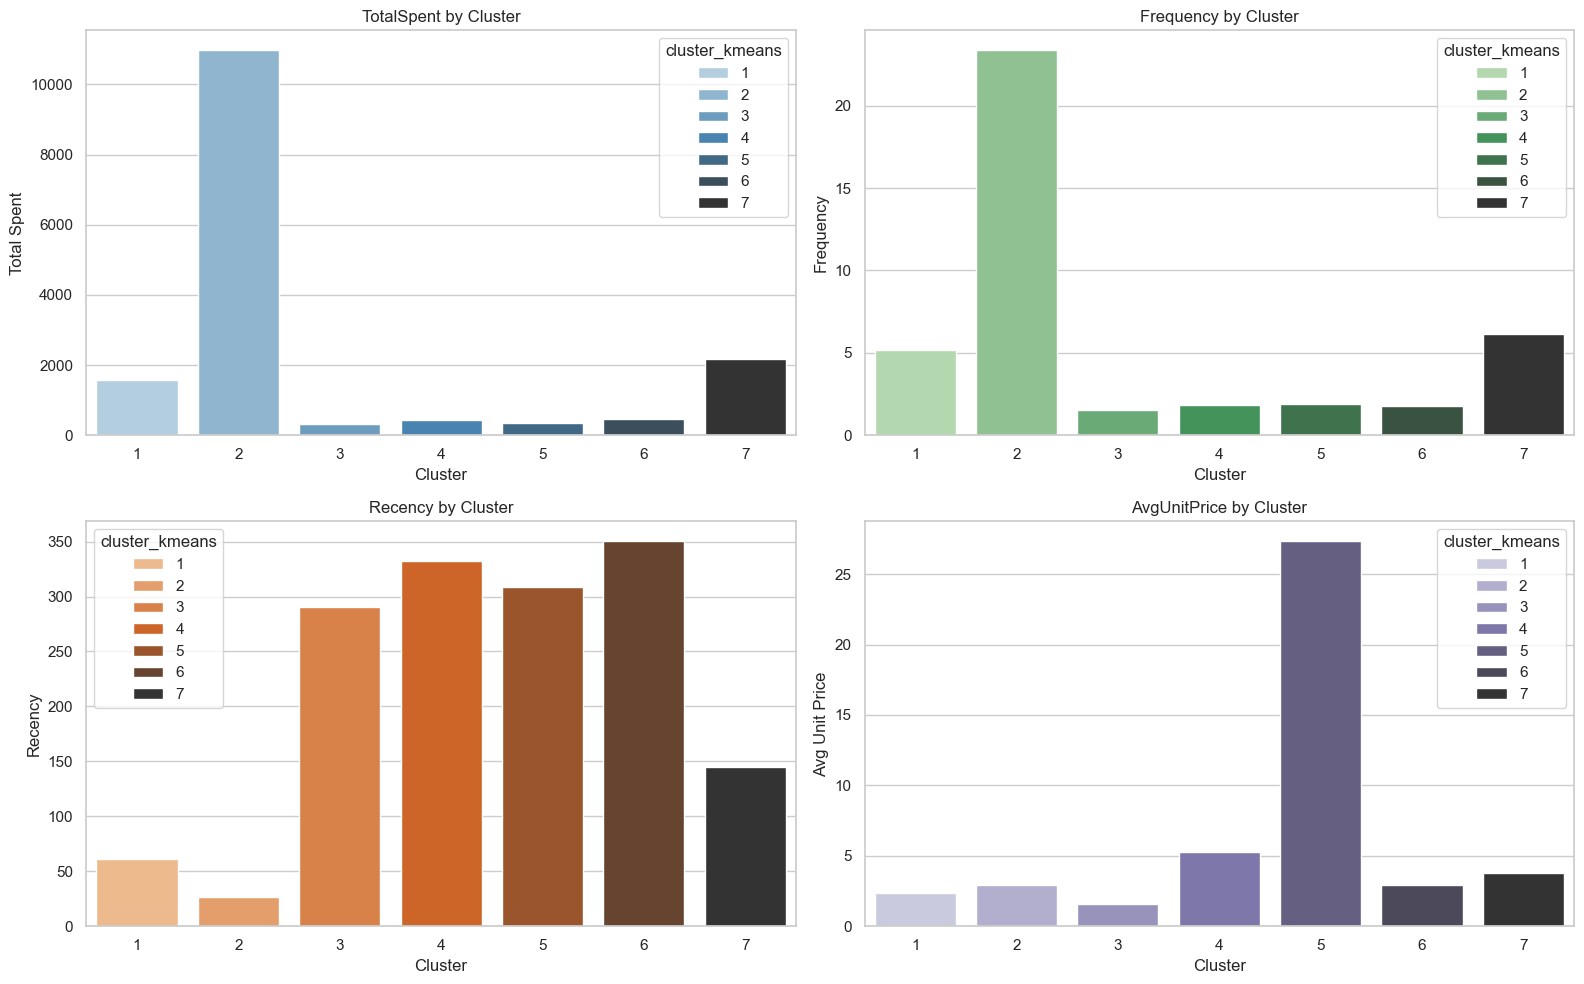

In [186]:
kmeans_cluster_df = final_df.groupby("cluster_kmeans")[features].mean().reset_index()

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# TotalSpent
sns.barplot(data=kmeans_cluster_df, x="cluster_kmeans", y="TotalSpent", hue="cluster_kmeans", ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("TotalSpent by Cluster")
axes[0, 0].set_xlabel("Cluster")
axes[0, 0].set_ylabel("Total Spent")

# Frequency
sns.barplot(data=kmeans_cluster_df, x="cluster_kmeans", y="Frequency", hue="cluster_kmeans", ax=axes[0, 1], palette="Greens_d")
axes[0, 1].set_title("Frequency by Cluster")
axes[0, 1].set_xlabel("Cluster")
axes[0, 1].set_ylabel("Frequency")

# Recency
sns.barplot(data=kmeans_cluster_df, x="cluster_kmeans", y="Recency", hue="cluster_kmeans", ax=axes[1, 0], palette="Oranges_d")
axes[1, 0].set_title("Recency by Cluster")
axes[1, 0].set_xlabel("Cluster")
axes[1, 0].set_ylabel("Recency")

# AvgUnitPrice
sns.barplot(data=kmeans_cluster_df, x="cluster_kmeans", y="AvgUnitPrice", hue="cluster_kmeans", ax=axes[1, 1], palette="Purples_d")
axes[1, 1].set_title("AvgUnitPrice by Cluster")
axes[1, 1].set_xlabel("Cluster")
axes[1, 1].set_ylabel("Avg Unit Price")

plt.tight_layout()
plt.show()

What Can We Learn From These Clusters? (KMeans Clustering)
Each customer cluster reveals distinct behavioral patterns based on four key features: TotalSpent, Frequency, Recency, and AvgUnitPrice. Here's what we can infer:

Cluster 1: Small and inactive spenders
Customers in this cluster have the lowest TotalSpent (~394) and low purchase Frequency (~1.46), but a high Recency (~176), indicating long periods without purchases.
These might be low-engagement or churned customers.

Cluster 2: Moderate spenders with moderate activity
These customers spend moderately (~554), shop more often (~2.26), and have a very short Recency (~14), suggesting they are recently active but not highly frequent buyers.
Potential candidates for engagement campaigns.

Cluster 3: Frequent, mid-tier buyers
Customers in this cluster have a higher TotalSpent (~1547), a relatively high Frequency (~4.56), and moderate Recency (~41).
They could be consistent buyers with potential for loyalty programs.

Cluster 4: High Recency, low frequency
These customers have the lowest Frequency (~1.44) and the highest Recency (~189), indicating dormant or infrequent buyers.
Likely require reactivation efforts.

Cluster 5: Top-tier loyal customers
This group has the highest TotalSpent (~7251), highest Frequency (~15.82), and very short Recency (~11), representing high-value, frequent buyers.
Strategic group for VIP treatment and retention campaigns.

Cluster 6: High spenders with moderate frequency
These customers spend significantly (~1726), with moderate Frequency (~4.54) and short Recency (~63).
Potential for up-sell and cross-sell strategies.

Cluster 7: Low spenders, inactive
Customers in this group have the lowest TotalSpent (~287), lowest Frequency (~1.40), and relatively long Recency (~119), indicating low engagement.
Likely candidates for win-back campaigns.

8. Interpretation and Insights
Here are the key takeaways:

KMeans Outperformed Other Methods:

Optimal k: Using the Elbow Method with KneeLocator, the optimal number of clusters was clearly identified, resulting in compact, well-separated clusters.
Stable and Consistent Results: Unlike Agglomerative Clustering and DBSCAN, KMeans consistently produced stable clusters, making it the most effective method for this dataset.
High Inertia Reduction: The elbow method showed a significant drop in inertia, confirming that the chosen cluster count captures the majority of variance without overfitting.
Agglomerative Clustering with PCA Refinement:

Initial Segmentation: Although initial results from Agglomerative Clustering were mixed, applying PCA to one of the larger, more complex clusters significantly improved segmentation quality.
Natural Sub-Clusters: The PCA-transformed cluster revealed clear sub-clusters, with stable results observed for 3 to 8 clusters, indicating a meaningful segmentation within this subset.
Improved Compactness: The use of PCA reduced noise and better captured the underlying structure of customer behaviors within this challenging cluster.
DBSCAN Limitations:

Parameter Sensitivity: Required careful tuning of eps and min_samples, but still produced a high number of noise points, reducing overall cluster quality.
High Dimensional Complexity: Struggled to handle the complex, overlapping structure of the customer data, leading to fragmented clusters.
 